<a href="https://colab.research.google.com/github/Zule-Carriazo/Actividad-4-POO/blob/main/TRABAJO_MINERIA_DATOS_Grupo5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TRABAJO MINERIA DE DATOS NRO. 2


  **Zuleima Beatriz Carriazo Manchego**

  **Miyanis Manuela Londoño Vélez**

  **Julián Alejandro Úsuga Ortiz**

  **Deivid Zhang Figueroa**
   
  Grupo Nro. 5



PUNTO 1A:  Cargue y explore el dataset explicando en qué consiste y las características que posee el mismo.

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_squared_error

In [ ]:
# Desde drive /content/drive/MyDrive/Colab Notebooks/auto-mpg.data-original.txt
url = "/content/drive/MyDrive/Colab Notebooks/auto-mpg.data-original.txt"
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
data = pd.read_csv(url, delim_whitespace=True, names=column_names) #, na_values='?'

data.sample(10)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
180,24.0,4.0,119.0,97.0,2545.0,17.0,75.0,3.0,datsun 710
355,37.7,4.0,89.0,62.0,2050.0,17.3,81.0,3.0,toyota tercel
95,14.0,8.0,302.0,137.0,4042.0,14.5,73.0,1.0,ford gran torino
196,15.5,8.0,304.0,120.0,3962.0,13.9,76.0,1.0,amc matador
379,29.0,4.0,135.0,84.0,2525.0,16.0,82.0,1.0,dodge aries se
255,36.1,4.0,91.0,60.0,1800.0,16.4,78.0,3.0,honda civic cvcc
284,16.2,6.0,163.0,133.0,3410.0,15.8,78.0,2.0,peugeot 604sl
27,24.0,4.0,107.0,90.0,2430.0,14.5,70.0,2.0,audi 100 ls
159,19.0,6.0,225.0,95.0,3264.0,16.0,75.0,1.0,plymouth valiant custom
258,20.2,8.0,302.0,139.0,3570.0,12.8,78.0,1.0,mercury monarch ghia


In [ ]:
print("Descripción del dataset:\n")
print(data.info())

print("\nResumen estadístico:\n")
print(data.describe())

print("\nValores nulos en el dataset:\n")
print(data.isnull().sum())

data[data.isnull().any(axis=1)].head()

Descripción del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    float64
 2   displacement  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    float64
 5   acceleration  406 non-null    float64
 6   model_year    406 non-null    float64
 7   origin        406 non-null    float64
 8   car_name      406 non-null    object 
dtypes: float64(8), object(1)
memory usage: 28.7+ KB
None

Resumen estadístico:

              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  406.000000    406.000000  400.000000   406.000000   
mean    23.514573    5.475369    194.779557  105.082500  2979.413793   
std      7.815984    1.712160    104.922458   38.768779   847.004328   
min      9.000000    3.00000

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
10,NaN,4.0,133.0,115.0,3090.0,17.5,70.0,2.0,citroen ds-21 pallas
11,NaN,8.0,350.0,165.0,4142.0,11.5,70.0,1.0,chevrolet chevelle concours (sw)
12,NaN,8.0,351.0,153.0,4034.0,11.0,70.0,1.0,ford torino (sw)
13,NaN,8.0,383.0,175.0,4166.0,10.5,70.0,1.0,plymouth satellite (sw)
14,NaN,8.0,360.0,175.0,3850.0,11.0,70.0,1.0,amc rebel sst (sw)


Este Dataset consiste en información sobre la eficiencia de combustible (en millas por galón, mpg) de distintos automóviles. Se recopiló para explorar cómo distintas características de un automóvil (como cilindros, peso, potencia, etc.) afectan su consumo de combustible.

Características del dataset:

   

*    mpg: Millas por galón, una medida de eficiencia de combustible, (variable continua).
*    cylinders: Número de cilindros en el motor, (variable discreta)
*    displacement: Cilindrada del motor en pulgadas cúbicas, (variable continua).
*    horsepower: Potencia del motor, (variable continua).
*    weight: Peso del vehículo en libras, (variable continua).
* acceleration: Tiempo de aceleración de 0 a 60 millas por hora, (variable continua).
*  model_year: Año del modelo del automóvil, (variable discreta).
*  origin: Código de origen del automóvil (1: USA, 2: Europa, 3: Japón), (variable discreta).
*  car_name: Nombre del automóvil (cadena de texto, variable categórica).


En él se ven algunos datos faltantes de las variables $mpg$ y de $horsepower$, así como el resumen estadístico de las variables consideradas numéricas

Siguiendo las especificaciones encontradas en la  página que explica el detalle de la base de datos, se convierten las variables a los tipos float, integer y categorical, según corresponde

In [ ]:
data['mpg'] = pd.to_numeric(data['mpg'], errors='coerce')
data['cylinders'] = data['cylinders'].astype('int')
data['displacement'] = pd.to_numeric(data['displacement'], errors='coerce')
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')
data['weight'] = pd.to_numeric(data['weight'], errors='coerce')
data['acceleration'] = pd.to_numeric(data['acceleration'], errors='coerce')
data['model_year'] = data['model_year'].astype('int')
data['origin'] = data['origin'].astype('int')
data['car_name'] = data['car_name'].astype(str)
data.dtypes

,0
mpg,float64
cylinders,int64
displacement,float64
horsepower,float64
weight,float64
acceleration,float64
model_year,int64
origin,int64
car_name,object


Una vez hecha esta conversión de tipo en cada variable, se observa el resumen estadistico de las continúas, y se mantiene en consideración la existencia de los datos faltantes de estas 2 variables.

In [ ]:
print("Descripción del dataset:\n")
print(data.info())

print("\nResumen estadístico:\n")
print(data.describe())

print("\nValores nulos en el dataset:\n")
print(data.isnull().sum())

data[data.isnull().any(axis=1)].head()


Descripción del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    int64  
 2   displacement  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    float64
 5   acceleration  406 non-null    float64
 6   model_year    406 non-null    int64  
 7   origin        406 non-null    int64  
 8   car_name      406 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.7+ KB
None

Resumen estadístico:

              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  406.000000    406.000000  400.000000   406.000000   
mean    23.514573    5.475369    194.779557  105.082500  2979.413793   
std      7.815984    1.712160    104.922458   38.768779   847.004328   
min      9.000000 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
10,NaN,4,133.0,115.0,3090.0,17.5,70,2,citroen ds-21 pallas
11,NaN,8,350.0,165.0,4142.0,11.5,70,1,chevrolet chevelle concours (sw)
12,NaN,8,351.0,153.0,4034.0,11.0,70,1,ford torino (sw)
13,NaN,8,383.0,175.0,4166.0,10.5,70,1,plymouth satellite (sw)
14,NaN,8,360.0,175.0,3850.0,11.0,70,1,amc rebel sst (sw)


La variable $horsepower$ tiene 6 valores nulos, y la variable $mpg$ tiene 8,  veamos la  manera mas adecuada de imputar estos valores. Conozcamos el comportamiento de la distibución de estas variables.

In [ ]:
sns.set(style="whitegrid")

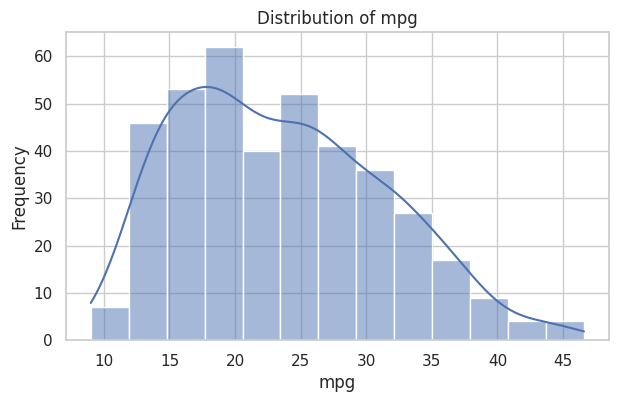

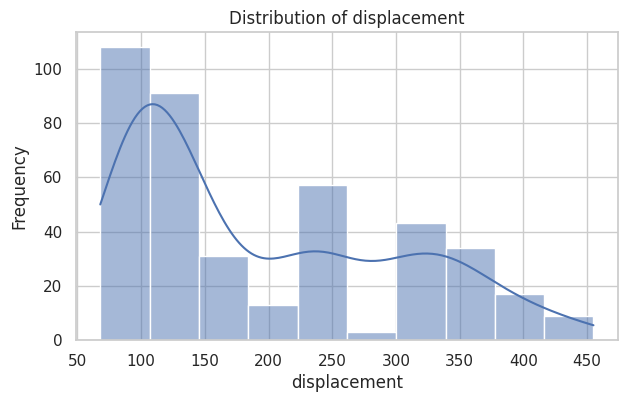

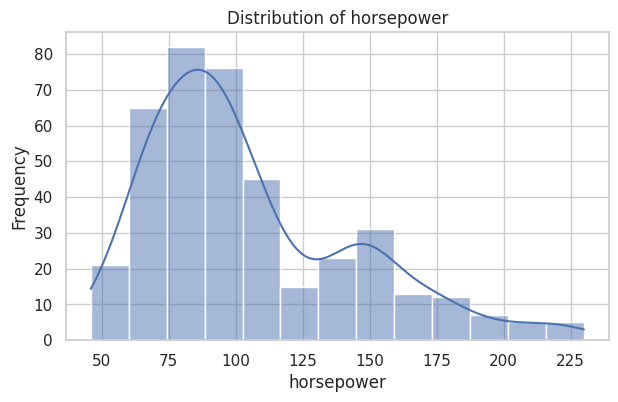

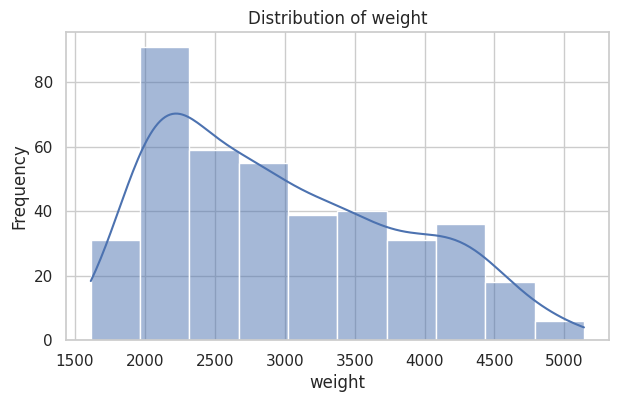

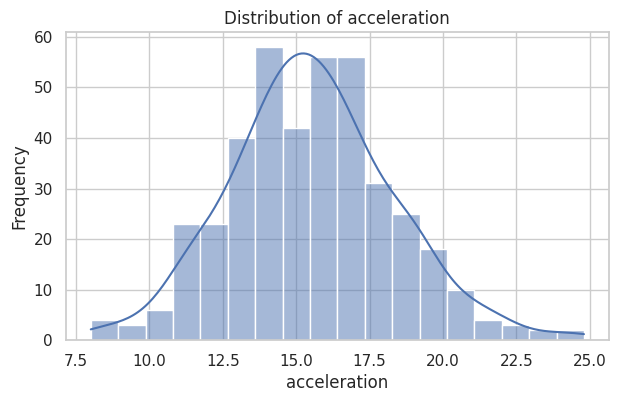

In [ ]:
numerical_columns = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']

for col in numerical_columns:
    plt.figure(figsize=(7, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


Los anteriores descriptivos permiten conocer la manera en que se distribuyen los datos de cada variable, considerando que no se comportan uniformemente a excepción de $asceleración$ es posible ver como el sesgo positivo de éstas, arrastrando la media por encima de la mediana.

<ipython-input-72-3ddd45bee8e5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette="muted")


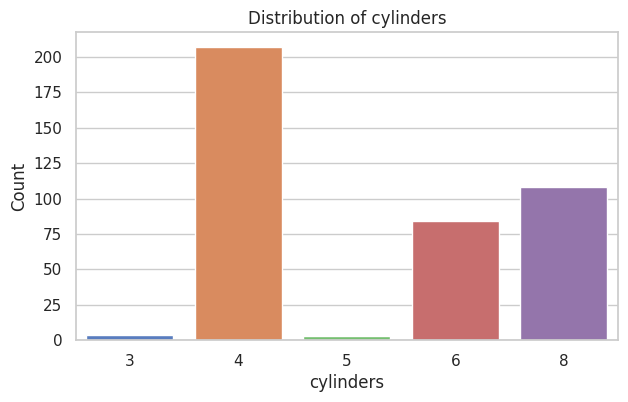

<ipython-input-72-3ddd45bee8e5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette="muted")


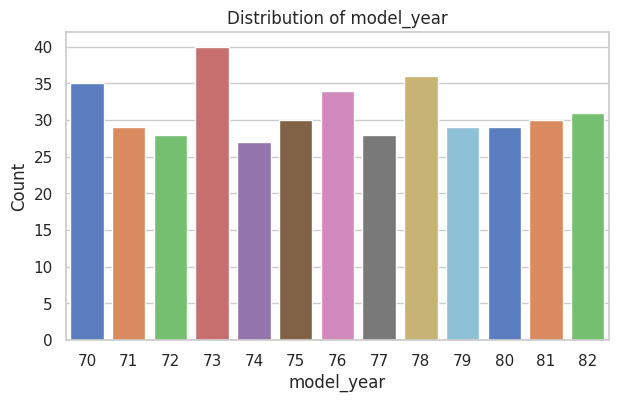

<ipython-input-72-3ddd45bee8e5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette="muted")


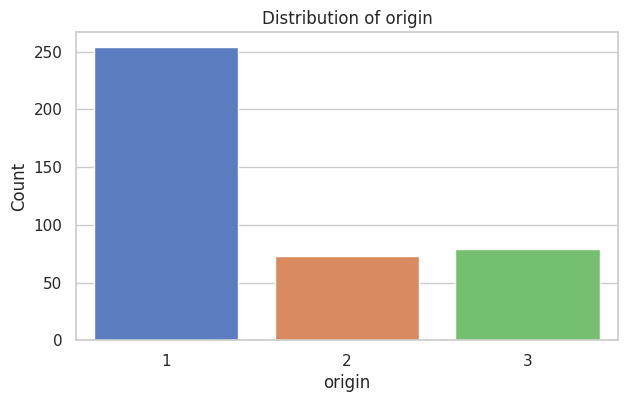

In [ ]:
categorical_columns = ['cylinders', 'model_year', 'origin']

for col in categorical_columns:
    plt.figure(figsize=(7, 4))
    sns.countplot(x=data[col], palette="muted")
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


Tambien se permite conocer la frecuencia de cada atributo en las variables discretas, notando en este último que los vehículos en su mayoría son de origen Estadounidense.

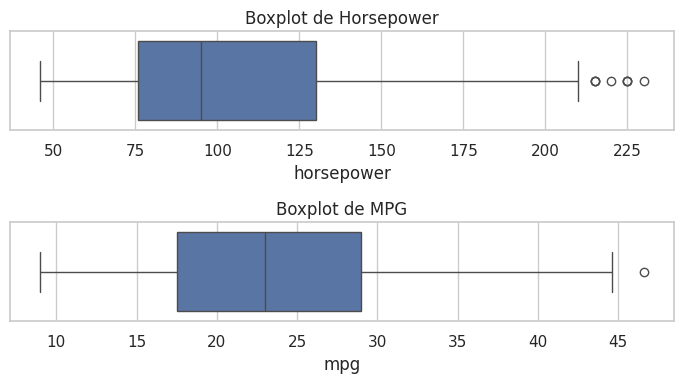

In [ ]:
plt.figure(figsize=(7, 4))

plt.subplot(2, 1, 1)
sns.boxplot(x=data['horsepower'])
plt.title('Boxplot de Horsepower')

plt.subplot(2, 1, 2)
sns.boxplot(x=data['mpg'])
plt.title('Boxplot de MPG')

plt.tight_layout()
plt.show()

Se observa alta variabilidad en los datos de horsepower por encima del tercer cuartil, es decir que no hay uniformidad en éstos, ademas de observarse la presencia de outliers.

Veamos ahora la correlación de las variables de interés con respecto a las demás para considerar la aplicación de imputación por medio de modelos de regresión u otro método apropiado.

mpg            -0.778427
cylinders       0.844158
displacement    0.898326
horsepower      1.000000
weight          0.866586
acceleration   -0.697124
model_year     -0.424419
origin         -0.460033
Name: horsepower, dtype: float64
mpg             1.000000
cylinders      -0.775396
displacement   -0.804203
horsepower     -0.778427
weight         -0.831741
acceleration    0.420289
model_year      0.579267
origin          0.563450
Name: mpg, dtype: float64


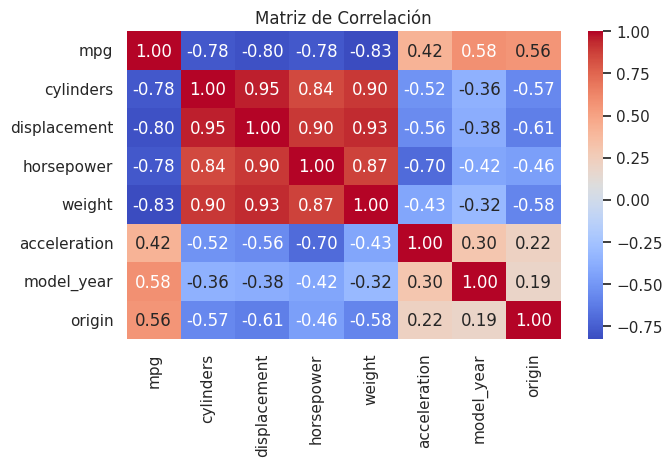

In [ ]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()
horsepower_corr = correlation_matrix['horsepower']
print(horsepower_corr)

mpg_corr = correlation_matrix['mpg']
print(mpg_corr)

plt.figure(figsize=(7,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

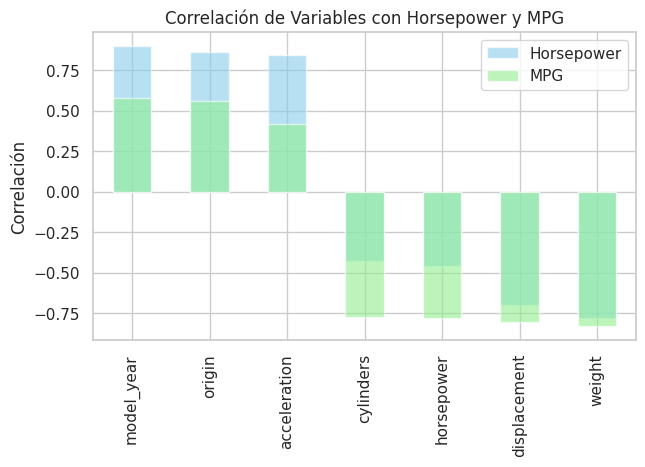

In [ ]:
plt.figure(figsize=(7,4))

horsepower_corr = numeric_data.corr()['horsepower']
horsepower_corr.drop('horsepower').sort_values(ascending=False).plot(kind='bar', color='skyblue', alpha=0.6, label='Horsepower')

mpg_corr = numeric_data.corr()['mpg']
mpg_corr.drop('mpg').sort_values(ascending=False).plot(kind='bar', color='lightgreen', alpha=0.6, label='MPG')

plt.title('Correlación de Variables con Horsepower y MPG')
plt.ylabel('Correlación')
plt.legend()
plt.show()


Los anteriores grñaficos permiten ver la alta a moderada correlación de las variables con estás dos, lo que podría ser buena idea imputar con un modelo de regresión, sin embrago dado que se trata de dos variables, resulta propicio la imputación simultanea con otro método.

Apesar de ser pocos datos (6 y 8) respectivamente para horsepower y mpg, en comparación con el total de registros (406), se quiere encontrar otro  medio  de imputación distinta a la eliminacion de éstos, para conservar la totalidad de la información que aportan las demás variables. La mitad de los datos de horsepower estan por debajo de 93,5 y la otra mitad están por encima de este valor, incluyendo datos atípicos por encima de 200 caballos de fuerza; por lo  cual imputar los valores faltantes con la media no resulta una buena decisión ya que no hay uniformidad en los datos y se podría uncurrir en sesgo de los resultados finales; así mismo, mpg presenta un sesgo positivo por lo que usar la media podría incrementarlo más, así que se decide imputar con MICE ya que trabaja en simultaneo  para estas dos variables, ademas de que tiene en cuenta la variabilidad inherente en los datos, lo que resulta en imputaciones que son más realistas y menos sesgadas.

In [ ]:
data_not_null = numeric_data.dropna(subset=['mpg', 'horsepower'])

# Separa una porción del dataset para validación
train_data, test_data = train_test_split(data_not_null, test_size=0.2, random_state=42)

# Aplica MICE en el dataset de entrenamiento
imputer = IterativeImputer(max_iter=10, random_state=0)
train_data_imputed = imputer.fit_transform(train_data)

# Imputar los valores de test y compararlos con los valores reales
test_data_imputed = imputer.transform(test_data)

# Calcular el error cuadrático medio (MSE)
mse_mpg = mean_squared_error(test_data['mpg'], test_data_imputed[:, numeric_data.columns.get_loc('mpg')])
mse_hp = mean_squared_error(test_data['horsepower'], test_data_imputed[:, numeric_data.columns.get_loc('horsepower')])

print(f"MSE for mpg: {mse_mpg}")
print(f"MSE for horsepower: {mse_hp}")


MSE for mpg: 0.0
MSE for horsepower: 0.0


In [ ]:
data = pd.DataFrame(data_imputed, columns=numeric_data.columns)
print(data)


      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0        8.0         307.0       130.0  3504.0          12.0   
1    15.0        8.0         350.0       165.0  3693.0          11.5   
2    18.0        8.0         318.0       150.0  3436.0          11.0   
3    16.0        8.0         304.0       150.0  3433.0          12.0   
4    17.0        8.0         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
401  27.0        4.0         140.0        86.0  2790.0          15.6   
402  44.0        4.0          97.0        52.0  2130.0          24.6   
403  32.0        4.0         135.0        84.0  2295.0          11.6   
404  28.0        4.0         120.0        79.0  2625.0          18.6   
405  31.0        4.0         119.0        82.0  2720.0          19.4   

     model_year  origin  
0          70.0     1.0  
1          70.0     1.0  
2          70.0     1.0  
3          70.0     1.0  
4    

Luego de la imputación de los datos faltantes de las dos variables, se comprueba que en efceto no haya faltado alguno, y se validan las metricas del método.

In [ ]:
print("\nValores nulos en el dataset:\n")
print(data.isnull().sum())

data[data.isnull().any(axis=1)].head()


Valores nulos en el dataset:

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin


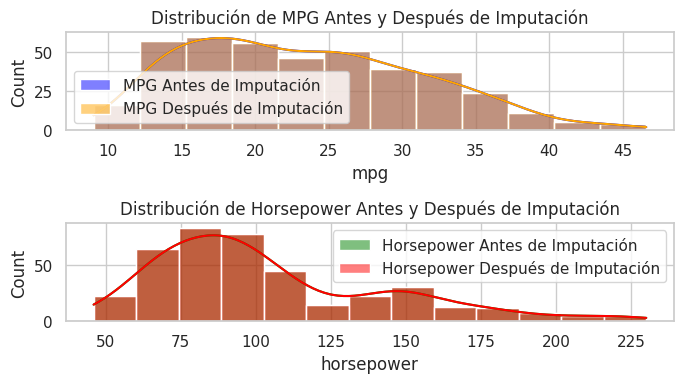

In [ ]:
data_imputed = pd.DataFrame(data_imputed, columns=data.columns)

plt.figure(figsize=(7, 4))

plt.subplot(2, 1, 1)
sns.histplot(data['mpg'].dropna(), kde=True, label='MPG Antes de Imputación', color='blue')
sns.histplot(data_imputed['mpg'], kde=True, label='MPG Después de Imputación', color='orange')
plt.legend()
plt.title('Distribución de MPG Antes y Después de Imputación')

plt.subplot(2, 1, 2)
sns.histplot(data['horsepower'].dropna(), kde=True, label='Horsepower Antes de Imputación', color='green')
sns.histplot(data_imputed['horsepower'], kde=True, label='Horsepower Después de Imputación', color='red')
plt.legend()
plt.title('Distribución de Horsepower Antes y Después de Imputación')

plt.tight_layout()
plt.show()


Los valores estimados no parecen afectar la distribución original de los datos, lo cual da indicios de buena estimación de los valores faltantes, es decir, las distribuciones de estas variables se mantienen estables, esto sugiere que la estructura de los datos no se ha alterado significativamente.

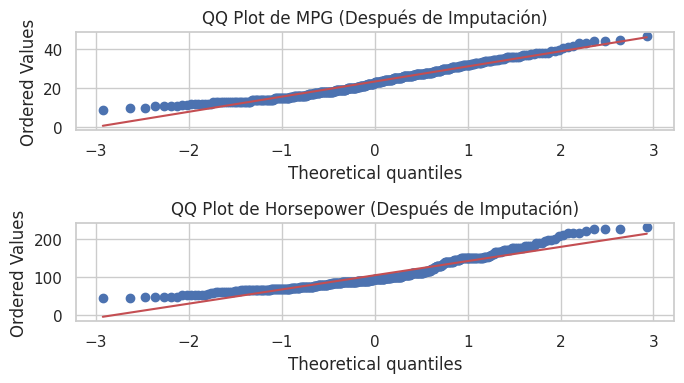

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))

plt.subplot(2, 1, 1)
stats.probplot(data_imputed['mpg'], dist="norm", plot=plt)
plt.title('QQ Plot de MPG (Después de Imputación)')

plt.subplot(2, 1, 2)
stats.probplot(data_imputed['horsepower'], dist="norm", plot=plt)
plt.title('QQ Plot de Horsepower (Después de Imputación)')

plt.tight_layout()
plt.show()


Al ser las imputaciones razonables, se observa que  los puntos se alinean aproximadamente con la línea de referencia

#### PUNTO 1B: Indague sobre la varianza de cada uno de los atributos que conforman el dataset. ¿Existen atributos que podrían ser eliminados de acuerdo con la técnica de Low Variance Factor?


Los atributos con una varianza muy baja tienen poca variabilidad y, en muchos casos, no aportan información útil al modelo, por lo que podrían ser candidatos para la eliminación

A continuación se procede a normalizar el rango de valores de las variables con Min-Max para luego aplicar  el método de Low Variance Filter

Como el dataset data_numeric está limpio y solo contiene datos numéricos, se calcula la varianza de cada atributo posterior a la normalización, para considerar que tanto pueden aportar en su variabilidad.

Una vez se hubo normalizado el rango de cada variable, se considera un umbral para aplicar el método de Low Variance Filter.
Es importante notar que la varianza de $acceleration$ es notablemente menor que la de los  demás atributos, esto sugiere que "acceleration" tiene poca variabilidad, lo que significa que no aporta mucha información adicional; por tanto bajo esta técnica, este atributo es el más opcionado a ser eliminado.


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Se normalizan los datos
scaler = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(numeric_data), columns=numeric_data.columns)

# Se calcula la varianza de los datos normalizados
variance_normalized = data_normalized.var()

print("Varianza de cada atributo después de la normalización:")
print(variance_normalized)

# Se aplica el Low Variance Filter (umbral de 0.03 para la varianza)
low_variance_columns = variance_normalized[variance_normalized < 0.03].index

print("Atributos con baja varianza (varianza < 0.03):")
print(low_variance_columns)


Varianza de cada atributo después de la normalización:
mpg             0.043211
cylinders       0.117260
displacement    0.073505
horsepower      0.044394
weight          0.057671
acceleration    0.027844
model_year      0.097590
origin          0.158993
dtype: float64
Atributos con baja varianza (varianza < 0.03):
Index(['acceleration'], dtype='object')


Por el criterio de Low Variance Filter la variable $acceleration$ puede ser candidata a ser eliminada ya que al normalizar sus datos y calcular la varianza de estos, no supera el umbral asignado de 0.03

#### PUNTO 1C:  Evalúe la relación entre atributos a partir del coeficiente de correlación de Pearson y un análisis gráfico de heatmap para estudiar la posibilidad de eliminar redundancia en el dataset. En caso de corresponder, aplique las técnicas de Reducing Highly Correlated Columns trabajadas en clase1.

El coeficiente de correlación de Pearson mide la fuerza y la dirección de la relación lineal entre dos variables numéricas. Los valores cercanos a 1 o -1 indican una fuerte correlación positiva o negativa, respectivamente, y los valores cercanos a 0 indican poca o ninguna correlación. Un heatmap de la matriz de correlación ayuda a identificar visualmente las relaciones entre atributos y detectar correlaciones altas que podrían indicar redundancia. En este caso se ve una alta correlacion entre $horsepower$ y $desplazamiento$, entre $desplazamiento$ y $cilindros$ y entre $desplazamiento$ y $peso$.

Así, se puede aplicar técnicas para reducir la redundancia eliminando una de las columnas en pares de variables altamente correlacionadas, con la posibilidad de eliminar redundancia en el dataset. El mecanismo consiste en iterar sobre la matriz de correlación para identificar pares de variables con una correlación superior al umbral, en este caso, se toma de $0.9$; luego, se selecciona una de las variables en cada par altamente correlacionado para eliminarla del dataset y la candidata resulta ser aquella cuyo promedio de correlacion con las demás fue el mas alto en comparación con su par.

In [ ]:
correlation_matrix_complete = numeric_data.corr()

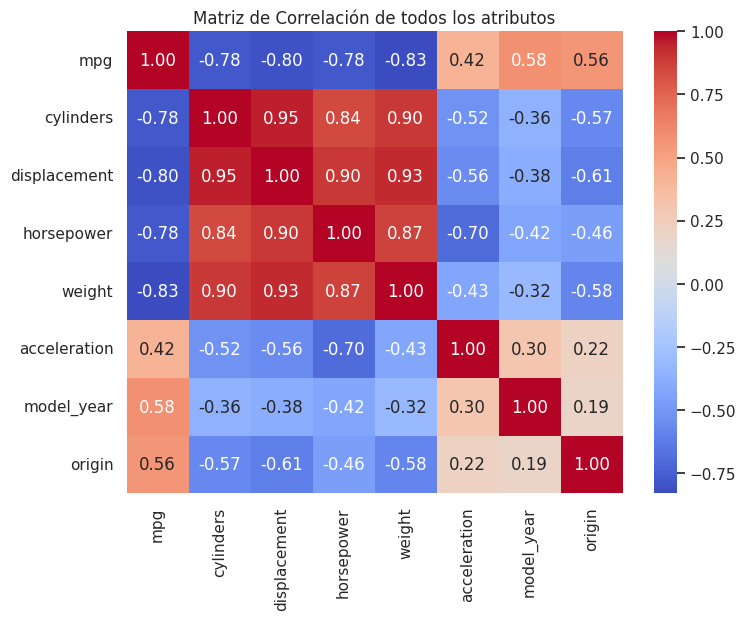

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_complete, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de todos los atributos')
plt.show()

In [ ]:
threshold = 0.9

# Identificar pares de atributos altamente correlacionados
high_corr_vars = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            high_corr_vars.add(colname)


# Elimina una de las columnas en cada par altamente correlacionado
data_reduced = numeric_data.drop(columns=high_corr_vars)

print(f"Columnas eliminadas debido a alta correlación: {high_corr_vars}")
print(f"Dataset reducido:\n{data_reduced.head()}")

Columnas eliminadas debido a alta correlación: {'displacement', 'weight'}
Dataset reducido:
    mpg  cylinders  horsepower  acceleration  model_year  origin
0  18.0          8       130.0          12.0          70       1
1  15.0          8       165.0          11.5          70       1
2  18.0          8       150.0          11.0          70       1
3  16.0          8       150.0          12.0          70       1
4  17.0          8       140.0          10.5          70       1


Se selecciona el par de variables $desplazamiento$ y $cilindros$ por ser los atributos con mas alto nivel de correlación, se promedian las correlaciones de cada atributos con las demas variables de la matriz excluyendo la correlación que presentan en común, se elije la variable cuyo promedio de correlación con las demás fue menor, que en este caso es corresponde a $cylinders$ con 0.65. Así mismo se procede con otro par de variables con alta correlación, en particular, superior al umbral asignado.

Por tanto con un umbral de $0.9$, los atributos $desplazamientos$ y $weight$ son las opcionadas a ser eliminadas bajo este criterio, contribuyendo a la reducción de dimensionalidad.

### 1D: Comparar la importancia de cada uno de los atributos en función de la técnica de determinación de Random Forest (suponiendo que intenta predecir la cantidad de cilindros de un auto). Analice la importancia de las variables de modo analítico y gráfico.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Definir las características (X) y la variable objetivo (y)
X_reducido = data_reduced.drop(columns='cylinders')
y = data_reduced['cylinders']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_reducido, y, test_size=0.3, random_state=42)

# Crear un imputador para rellenar los valores faltantes (NaN) con la media de cada columna
imputer = SimpleImputer(strategy='mean')

# Ajustar el imputador a los datos de entrenamiento y transformar tanto los datos de entrenamiento como los de prueba
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Crear y entrenar el modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Usar los datos imputados para el entrenamiento
model.fit(X_train_imputed, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Obtener la importancia de las variables
importances = model.feature_importances_

# Crear un DataFrame para visualizar las importancias
importance_df = pd.DataFrame({'Feature': X_reducido.columns, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Importancia de las Variables:")
print(importance_df)


Importancia de las Variables:
        Feature  Importance
1    horsepower    0.372410
0           mpg    0.344044
2  acceleration    0.122646
4        origin    0.101409
3    model_year    0.059491


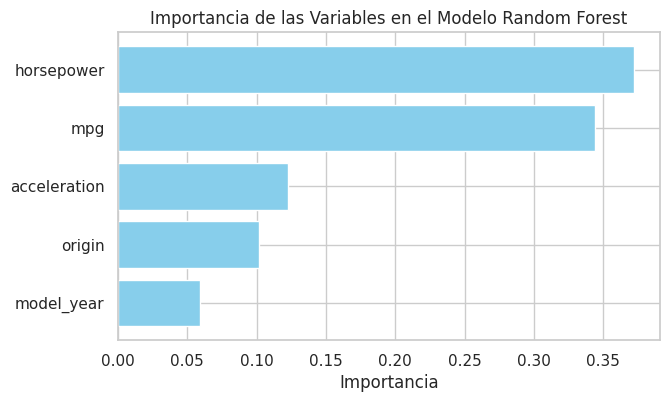

In [ ]:
#import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importancia')
plt.title('Importancia de las Variables en el Modelo Random Forest')
plt.gca().invert_yaxis()
plt.show()


El modelo sugiere que las variables más directamente relacionadas con la mecánica y el rendimiento del automóvil son mpg y horsepower, éstas son las que más influyen en la determinación del número de cilindros; mpg de 0.367730, que representa millas por galón, es la más importante en el modelo, con una importancia de aproximadamente 36.77%. Esto sugiere que mpg tiene una relación significativa con el número de cilindros. Por otra parte, las variables menos importantes son origin y model_year, las cuales tienen una relación más indirecta y, por lo tanto, son menos relevantes para esta predicción en el Modelo Random Forest; model_year con 0.046190 sugiere que el año del modelo es el menos importante con una importancia de aproximadamente 4.62%. Esto indica que, aunque el año de fabricación puede influir ligeramente en la tecnología del motor y, por lo tanto, en el número de cilindros, su impacto es mínimo comparado con las otras variables

## PUNTO 2

### 2A: Cargue y explore el dataset explicando en qué consiste y las características que posee el mismo.

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
file_path = '/content/drive/MyDrive/Colab Notebooks/covid19.xlsx'
df = pd.read_excel(file_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Exploración del tadaset

In [ ]:
df.info()
df.describe()
df.isnull().sum()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          215 non-null    int64  
 1   country       215 non-null    object 
 2   cases         215 non-null    object 
 3   deaths        183 non-null    float64
 4   recovered     211 non-null    float64
 5   active        213 non-null    object 
 6   critical      129 non-null    float64
 7   cases_1Mpop   213 non-null    float64
 8   deaths_1Mpop  181 non-null    float64
 9   tests         189 non-null    object 
 10  tests_1Mpop   189 non-null    float64
 11  population    215 non-null    object 
 12  continent     213 non-null    object 
dtypes: float64(6), int64(1), object(6)
memory usage: 22.0+ KB


Index(['rank', 'country', 'cases', 'deaths', 'recovered', 'active', 'critical',
       'cases_1Mpop', 'deaths_1Mpop', 'tests', 'tests_1Mpop', 'population',
       'continent'],
      dtype='object')

In [ ]:
df.sample(10)


,rank,country,cases,deaths,recovered,active,critical,cases_1Mpop,deaths_1Mpop,tests,tests_1Mpop,population,continent
161,162,Guyana,135,10.0,62.000,63,2.0,172.000,13.0,1.457,1.853,786.17,South America
14,15,Saudi Arabia,74.795,399.0,45.668,28.728,372.0,2.152,11.0,722.079,20.776,"34,756,224",Asia
189,190,Namibia,21,NaN,14.000,7,NaN,8.000,NaN,3.117,1.229,"2,535,948",Africa
202,203,Vatican City,12,NaN,2.000,10,NaN,14.981,NaN,NaN,NaN,801,Europe
151,152,Uganda,212,NaN,68.000,144,NaN,5.000,NaN,86.714,1.903,"45,574,375",Africa
178,179,Zimbabwe,56,4.0,25.000,27,NaN,4.000,0.0,37.039,2.496,"14,840,039",Africa
198,199,Saint Kitts and Nevis,15,NaN,15.000,0,NaN,282.000,NaN,394,7.411,53.161,North America
109,110,Haiti,958,27.0,22.000,909,NaN,84.000,2.0,2.718,239.000,"11,388,004",North America
102,103,Guinea-Bissau,1.114,6.0,42.000,1.066,NaN,568.000,3.0,1.5,764.000,"1,962,847",Africa
111,112,Cyprus,937,17.0,594.000,326,10.0,777.000,14.0,99.733,82.666,"1,206,464",Asia


In [ ]:
print("\nValores nulos en el dataset:\n")
print(df.isnull().sum())

# Mostrar ejemplos de datos nulos si existen
df[df.isnull().any(axis=1)].head()


Valores nulos en el dataset:

rank             0
country          0
cases            0
deaths          32
recovered        4
active           2
critical        86
cases_1Mpop      2
deaths_1Mpop    34
tests           26
tests_1Mpop     26
population       0
continent        2
dtype: int64


,rank,country,cases,deaths,recovered,active,critical,cases_1Mpop,deaths_1Mpop,tests,tests_1Mpop,population,continent
4,5,UK,261.184,36.914,NaN,NaN,1.559,3.849,544.0,"3,532,634",52.065,"67,850,075",Europe
13,14,China,82.985,4.634,78.268,83,7.000,58.000,3.0,NaN,NaN,"1,439,323,776",Asia
20,21,Netherlands,45.445,5.830,NaN,NaN,223.000,2.653,340.0,324.918,18.967,"17,131,112",Europe
30,31,Indonesia,22.75,1.391,5.642,15.717,NaN,83.000,5.0,256.946,940.000,"273,223,931",Asia
52,53,Algeria,8.503,609.000,4.747,3.147,27.000,194.000,14.0,NaN,NaN,"43,765,771",Africa


Este dataset contiene información sobre los casos de COVID-19 reportados a nivel mundial, incluyendo variables como el ranking de paises con mayor número de casos confirmados, muertes, recuperaciones, casos activos hasta el 13 de abril de 2024, casos considerados críticos, es decir, personas en estado grave, casos por millón de personas, muertes por millón de habitantes de un país, número de pruebas de COVID-19 realizadas, y por cada millón de personas en la población, tamaño de la población por país y continente. Toda esta información actualizada hasta el 13 de abril de 2024, debido a que muchos paises dejaron de reportar estos casos por lo que se descontinuó el reporte de los totales globales para no incurrir en cálculos estadísticamente no válidos.

En el dataset se observan tanto valores faltantes como registros con valores  igual a cero que debido al contexto de la información, es pertinente mantener en la base de datos.

En la minería de datos se realizará la imputación de estos valores faltantes por medio de técnicas avanzadas

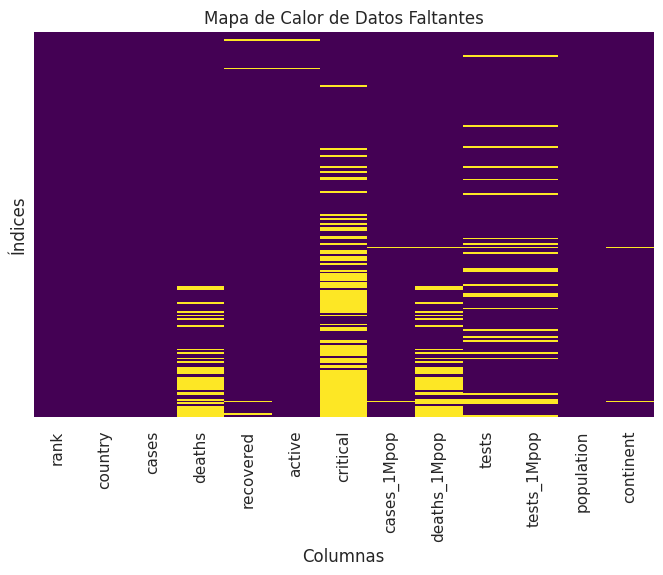

In [ ]:
missing_data_matrix = df.isnull()

# Mapa de calor para visualizar los datos faltantes
plt.figure(figsize=(8, 5))
sns.heatmap(missing_data_matrix, cbar=False, cmap='viridis', yticklabels=False)
plt.title('Mapa de Calor de Datos Faltantes')
plt.xlabel('Columnas')
plt.ylabel('Índices')
plt.show()

Se consideran las variables numéricas para corregir las variables que son tipo entero pero que tienen cifras separadas por comas, se procede a renombrar los NaN con el valor $-99$ (posteriormente esto se reversa)

In [ ]:
columns_to_convert = ['cases', 'deaths', 'recovered', 'active', 'critical', 'cases_1Mpop', 'deaths_1Mpop', 'tests', 'tests_1Mpop', 'population']

for col in columns_to_convert:
    # Sustituir inf por NaN
    df[col].replace([np.inf, -np.inf], np.nan, inplace=True)

    # Imputar valores NaN
    df[col].fillna(-99, inplace=True)

    # Ensure commas are removed (this is the crucial step)
    df[col] = df[col].astype(str).str.replace(',', '').astype(float)

    # Convertir a enteros
    df[col] = df[col].astype('int')

In [ ]:
df.head(10)

,rank,country,cases,deaths,recovered,active,critical,cases_1Mpop,deaths_1Mpop,tests,tests_1Mpop,population,continent
0,1,USA,1696547,99,456,1140391,17,5,301,15029393,45,330806424,North America
1,2,Brazil,367,22,149,195,8,1,108,735,3,212405664,South America
2,3,Russia,353,3,118,230,2,2,25,8945384,61,145928315,Europe
3,4,Spain,282,28,196,57,854,6,615,3556567,76,46752999,Europe
4,5,UK,261,36,-99,-99,1,3,544,3532634,52,67850075,Europe
5,6,Italy,230,32,141,55,541,3,544,3482253,57,60470472,Europe
6,7,France,182,28,65,88,1,2,436,1384633,21,65259187,Europe
7,8,Germany,180,8,161,11,873,2,100,3595059,42,83757235,Europe
8,9,Turkey,157,4,120,33,756,1,52,1853754,22,84244944,Asia
9,10,India,144,4,60,80,8,105,3,3033591,2,1378604014,Asia


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   rank          215 non-null    int64 
 1   country       215 non-null    object
 2   cases         215 non-null    int64 
 3   deaths        215 non-null    int64 
 4   recovered     215 non-null    int64 
 5   active        215 non-null    int64 
 6   critical      215 non-null    int64 
 7   cases_1Mpop   215 non-null    int64 
 8   deaths_1Mpop  215 non-null    int64 
 9   tests         215 non-null    int64 
 10  tests_1Mpop   215 non-null    int64 
 11  population    215 non-null    int64 
 12  continent     213 non-null    object
dtypes: int64(11), object(2)
memory usage: 22.0+ KB


In [ ]:
# Filtrar filas donde al menos una de las columnas en 'columns_to_convert' tiene el valor -99
filtered_df = df[df[columns_to_convert].isin([-99]).any(axis=1)]
print(filtered_df)

     rank                country  cases  deaths  recovered  active  critical  \
4       5                     UK    261      36        -99     -99         1   
13     14                  China     82       4         78      83         7   
20     21            Netherlands     45       5        -99     -99       223   
30     31              Indonesia     22       1          5      15       -99   
52     53                Algeria      8     609          4       3        27   
..    ...                    ...    ...     ...        ...     ...       ...   
210   211  Caribbean Netherlands      6     -99          6       0       -99   
211   212              St. Barth      6     -99          6       0       -99   
212   213               Anguilla      3     -99          3       0       -99   
213   214                Lesotho      2     -99        -99       2       -99   
214   215  Saint Pierre Miquelon      1     -99          1       0       -99   

     cases_1Mpop  deaths_1Mpop    tests

In [ ]:
# Reemplazar -99 con NaN en las columnas especificadas
df[columns_to_convert] = df[columns_to_convert].replace(-99, np.nan)

In [ ]:
print(df.isnull().sum())

rank             0
country          0
cases            0
deaths          32
recovered        4
active           2
critical        86
cases_1Mpop      2
deaths_1Mpop    34
tests           26
tests_1Mpop     26
population       0
continent        2
dtype: int64


In [ ]:
!pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 2.0 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29880 sha256=276f7a8f32c612c38d8daaa52f4f71534c5cd5ae3dd61798620f1245f344684f
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11330 sha256=4b20910a7e89e2054e2a681033a98a5c33335315c8f3dfd43626e99754aaf249
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [ ]:
from fancyimpute import IterativeImputer
# Crear un imputador MICE (IterativeImputer en fancyimpute)
imputer = IterativeImputer()

# Aplicar el imputador a las columnas que deseas imputar
df_imputed = pd.DataFrame(imputer.fit_transform(df[columns_to_convert]), columns=columns_to_convert)

# Reemplazar las columnas originales en el DataFrame
df[columns_to_convert] = df_imputed

# Verificar si quedan valores NaN
print(df[columns_to_convert].isnull().sum())


cases           0
deaths          0
recovered       0
active          0
critical        0
cases_1Mpop     0
deaths_1Mpop    0
tests           0
tests_1Mpop     0
population      0
dtype: int64


In [ ]:
df.sample(10)

,rank,country,cases,deaths,recovered,active,critical,cases_1Mpop,deaths_1Mpop,tests,tests_1Mpop,population,continent
101,102,Lebanon,1.0,26.000000,688.0,405.0,4.000000,164.0,4.000000,74.0,10.0,6828370.0,Asia
49,50,Bahrain,9.0,14.000000,4.0,4.0,8.000000,5.0,8.000000,283.0,167.0,1694642.0,Asia
152,153,Mozambique,209.0,1.000000,71.0,137.0,60.567900,7.0,0.000000,8.0,282.0,31156229.0,Africa
156,157,Faeroe Islands,187.0,95.664619,187.0,0.0,65.193167,3.0,48.895706,9.0,187.0,48.0,Europe
98,99,Kenya,1.0,52.000000,402.0,832.0,1.000000,24.0,1.000000,61.0,1.0,53641131.0,Africa
67,68,Luxembourg,3.0,110.000000,3.0,102.0,4.000000,6.0,176.000000,68.0,108.0,624.0,Europe
16,17,Mexico,68.0,7.000000,47.0,13.0,378.000000,533.0,57.000000,219.0,1.0,128792446.0,North America
37,38,Egypt,17.0,783.000000,4.0,12.0,41.000000,176.0,8.000000,135.0,1.0,102125693.0,Africa
201,202,Greenland,12.0,95.656711,11.0,1.0,65.252448,211.0,48.913910,1.0,33.0,56.0,North America
86,87,Cuba,1.0,82.000000,1.0,161.0,3.000000,172.0,7.000000,94.0,8.0,11327291.0,North America


In [ ]:
# Estadísticas descriptivas antes y  después de la imputación
print("Antes de la imputación:")
print(df.describe())

print("Después de la imputación:")
print(df[columns_to_convert].describe())


Antes de la imputación:
             rank         cases      deaths   recovered        active  \
count  215.000000  2.150000e+02  215.000000  215.000000  2.150000e+02   
mean   108.000000  8.038060e+03   94.150193  138.804410  5.423607e+03   
std     62.209324  1.156937e+05  161.681588  217.221049  7.776611e+04   
min      1.000000  1.000000e+00    1.000000    1.000000 -2.108471e+01   
25%     54.500000  7.000000e+00    6.000000    6.000000  3.000000e+00   
50%    108.000000  2.400000e+01   28.000000   25.000000  2.100000e+01   
75%    161.500000  1.845000e+02   95.692655  152.000000  1.245000e+02   
max    215.000000  1.696547e+06  873.000000  992.000000  1.140391e+06   

         critical  cases_1Mpop  deaths_1Mpop         tests  tests_1Mpop  \
count  215.000000   215.000000    215.000000  2.150000e+02   215.000000   
mean    70.804229   153.424393     53.490033  2.632559e+05    95.796572   
std    131.877549   212.972095    114.634491  1.332138e+06   188.346367   
min      1.000000 

###  2B: Aplicar distintos métodos de normalización  y analizar las distribuciones resultantes. (Gráficos hist, qqplot, density, boxplot).

El proposito principal de la normalización es ajustar los valores de las variables a un rango común, lo que facilita la comparación, mejora el rendimiento de los modelos y reduce el sesgo que pueden introducir los diferentes rangos de valores en los datos, veamos diferentes métodos para ello

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import scipy.stats as stats
columns_to_normalize = ['cases', 'deaths', 'recovered', 'active', 'critical', 'cases_1Mpop', 'deaths_1Mpop', 'tests', 'tests_1Mpop', 'population']

# 1. Min-Max
scaler_min_max = MinMaxScaler()
df_min_max_scaled = df[columns_to_normalize].copy()
df_min_max_scaled[columns_to_normalize] = scaler_min_max.fit_transform(df_min_max_scaled[columns_to_normalize])

# 2. Z-score Normalization
scaler_standard = StandardScaler()
df_standard_scaled = df[columns_to_normalize].copy()
df_standard_scaled[columns_to_normalize] = scaler_standard.fit_transform(df_standard_scaled[columns_to_normalize])

In [ ]:
# 3. Decimal Scaling
df_decimal_scaled = df[columns_to_normalize].copy()

# Función para aplicar Decimal Scaling
def decimal_scaling(column):
    max_value = column.abs().max()
    scaling_factor = 10 ** np.ceil(np.log10(max_value))
    return column / scaling_factor

# Aplicar Decimal Scaling a las columnas seleccionadas
df_decimal_scaled[columns_to_normalize] = df_decimal_scaled[columns_to_normalize].apply(decimal_scaling)

# Verifica los primeros valores después de la normalización
print(df_decimal_scaled.head())


      cases  deaths  recovered    active  critical  cases_1Mpop  deaths_1Mpop  \
0  0.169655   0.099   0.456000  0.114039     0.017        0.005         0.301   
1  0.000037   0.022   0.149000  0.000019     0.008        0.001         0.108   
2  0.000035   0.003   0.118000  0.000023     0.002        0.002         0.025   
3  0.000028   0.028   0.196000  0.000006     0.854        0.006         0.615   
4  0.000026   0.036   0.135965  0.000015     0.001        0.003         0.544   

      tests  tests_1Mpop  population  
0  0.150294        0.045    0.033081  
1  0.000007        0.003    0.021241  
2  0.089454        0.061    0.014593  
3  0.035566        0.076    0.004675  
4  0.035326        0.052    0.006785  


A continuación se muestran las diferentes comparaciones que se tienen por métodos

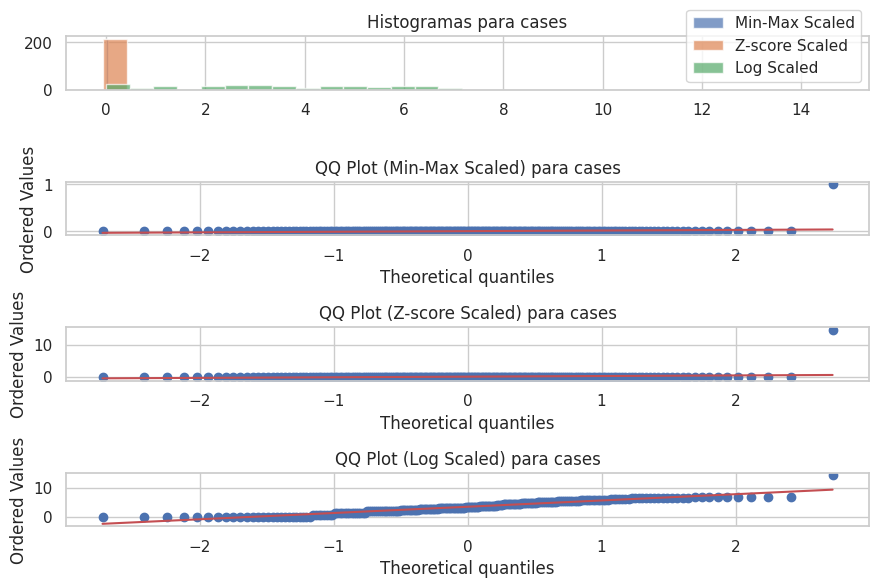

<ipython-input-137-7ac2bca099b9>:34: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_min_max_scaled[column], label='Min-Max Scaled', shade=True)
<ipython-input-137-7ac2bca099b9>:35: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_standard_scaled[column], label='Z-score Scaled', shade=True)
<ipython-input-137-7ac2bca099b9>:36: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_log_scaled[column], label='Log Scaled', shade=True)


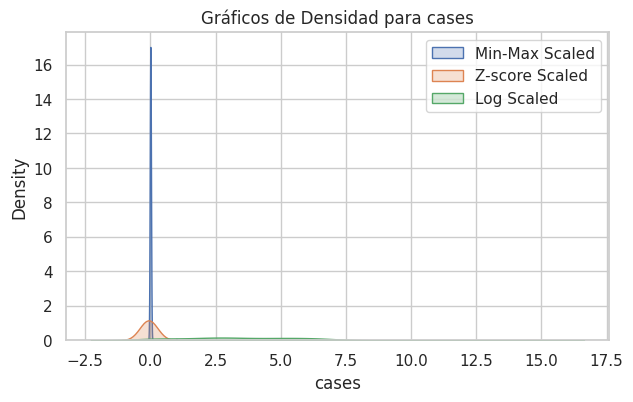

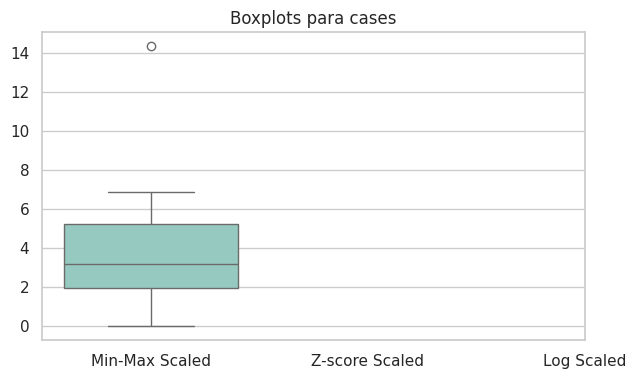

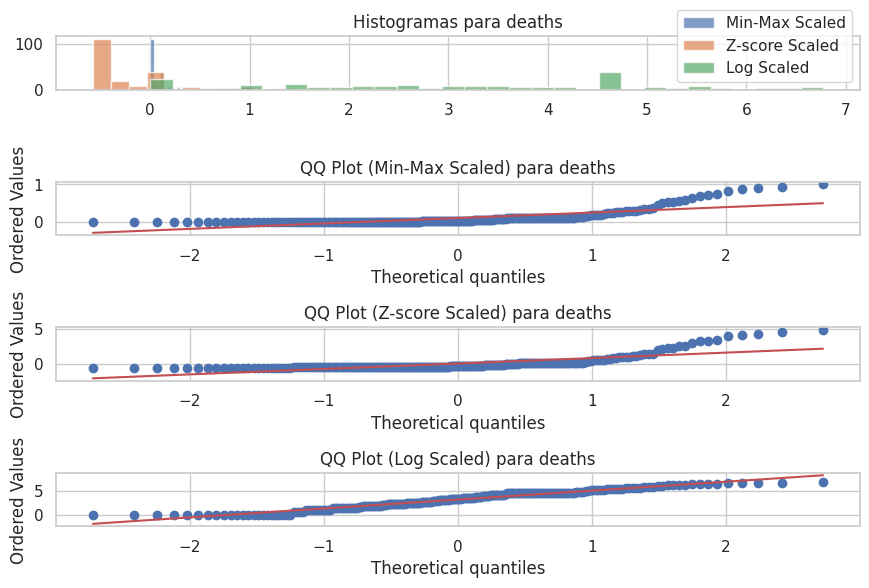

<ipython-input-137-7ac2bca099b9>:34: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_min_max_scaled[column], label='Min-Max Scaled', shade=True)
<ipython-input-137-7ac2bca099b9>:35: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_standard_scaled[column], label='Z-score Scaled', shade=True)
<ipython-input-137-7ac2bca099b9>:36: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_log_scaled[column], label='Log Scaled', shade=True)


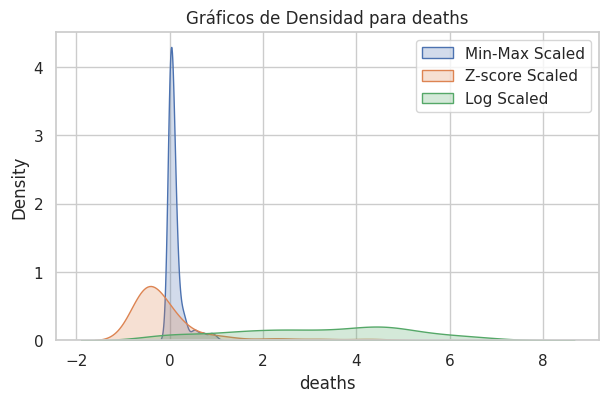

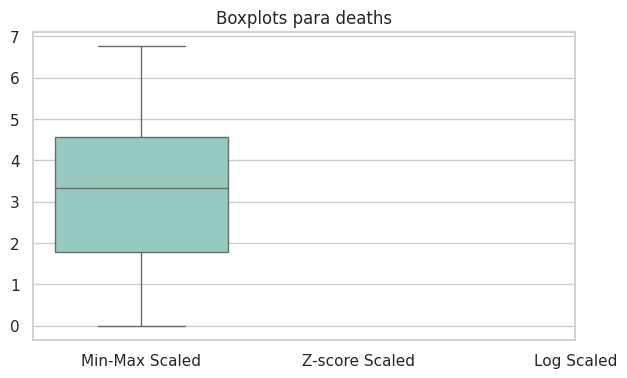

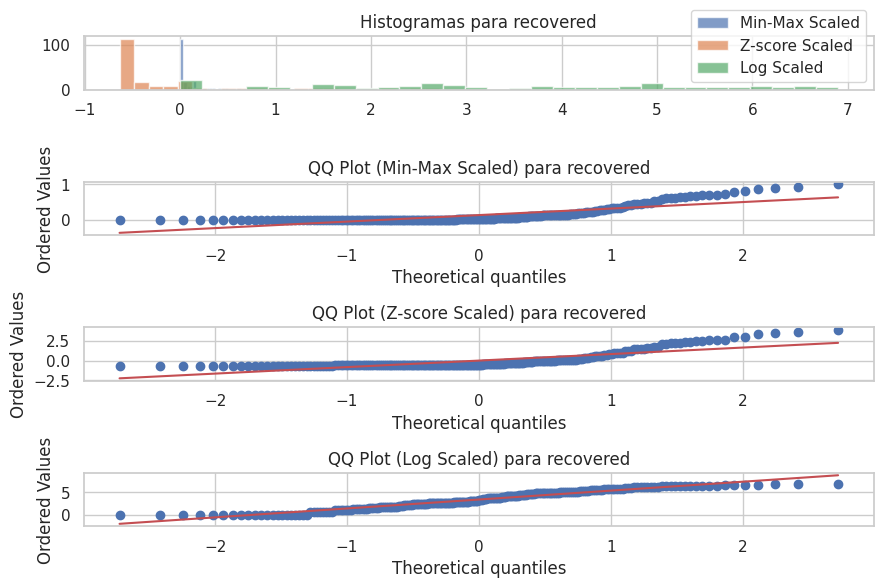

<ipython-input-137-7ac2bca099b9>:34: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_min_max_scaled[column], label='Min-Max Scaled', shade=True)
<ipython-input-137-7ac2bca099b9>:35: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_standard_scaled[column], label='Z-score Scaled', shade=True)
<ipython-input-137-7ac2bca099b9>:36: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_log_scaled[column], label='Log Scaled', shade=True)


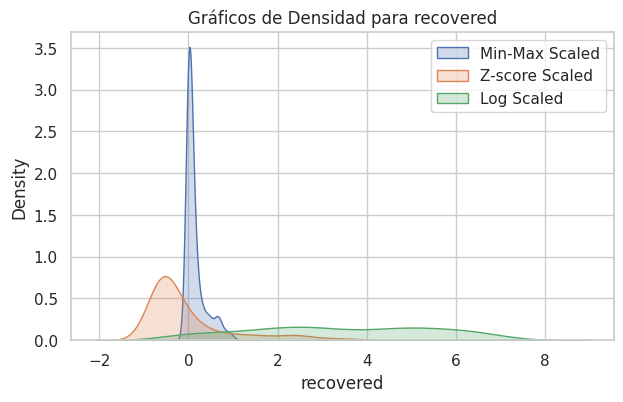

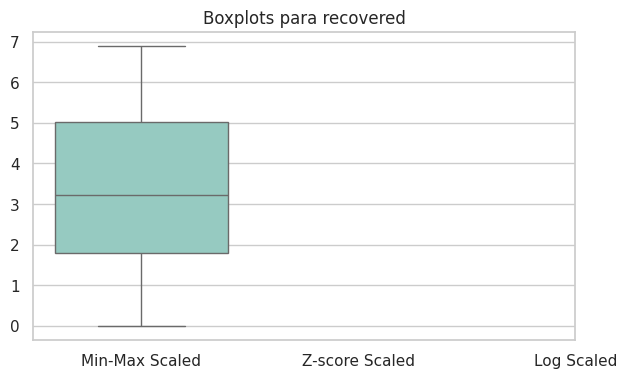

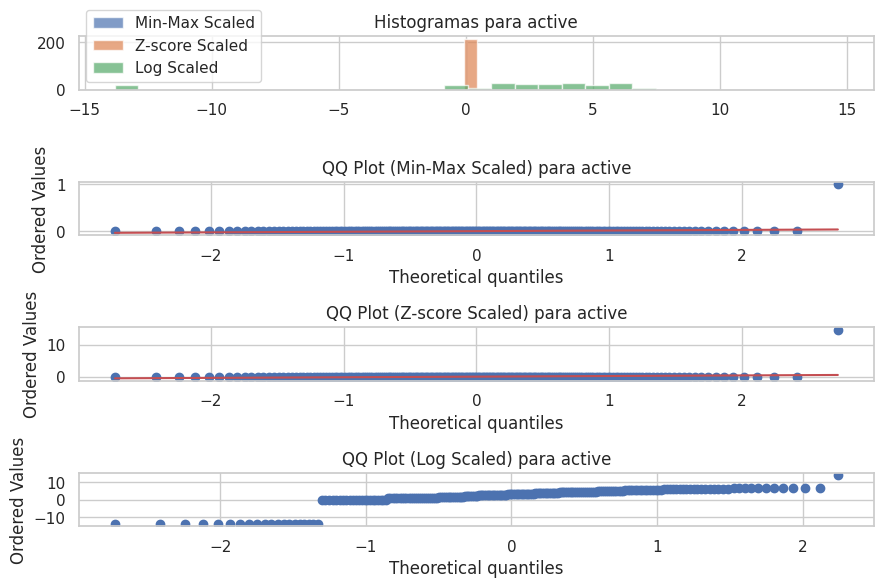

<ipython-input-137-7ac2bca099b9>:34: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_min_max_scaled[column], label='Min-Max Scaled', shade=True)
<ipython-input-137-7ac2bca099b9>:35: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_standard_scaled[column], label='Z-score Scaled', shade=True)
<ipython-input-137-7ac2bca099b9>:36: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_log_scaled[column], label='Log Scaled', shade=True)


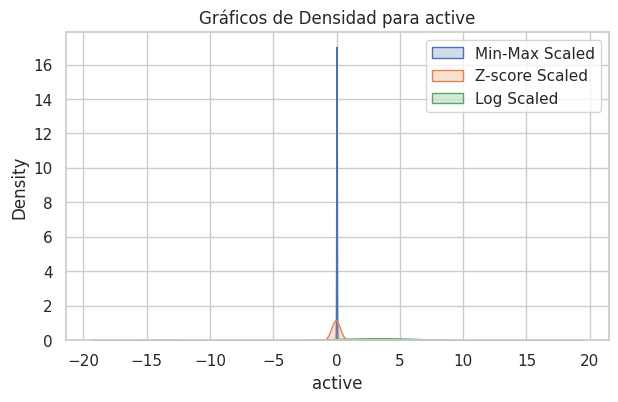

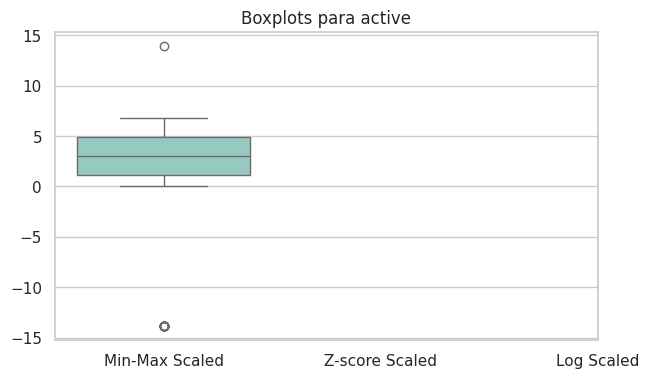

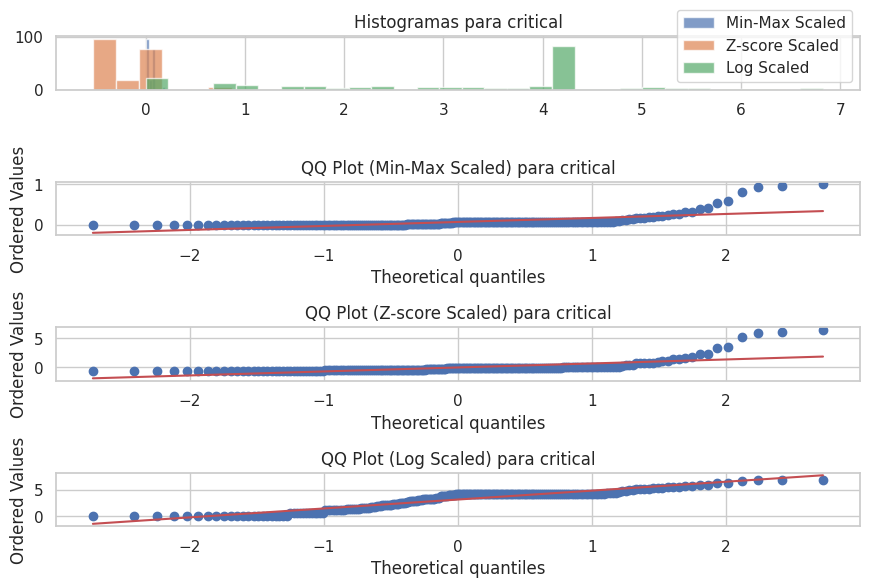

<ipython-input-137-7ac2bca099b9>:34: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_min_max_scaled[column], label='Min-Max Scaled', shade=True)
<ipython-input-137-7ac2bca099b9>:35: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_standard_scaled[column], label='Z-score Scaled', shade=True)
<ipython-input-137-7ac2bca099b9>:36: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_log_scaled[column], label='Log Scaled', shade=True)


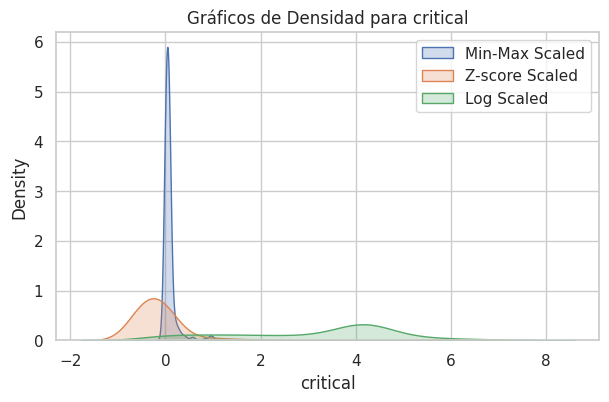

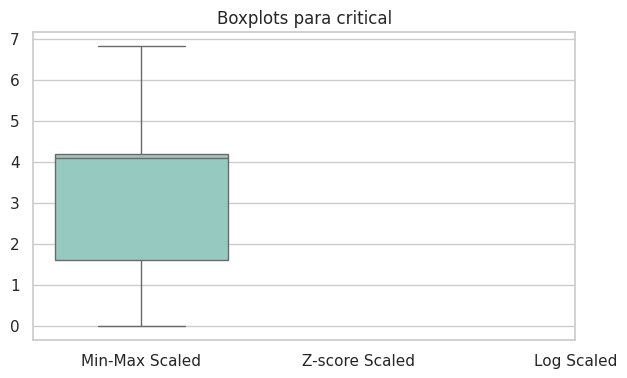

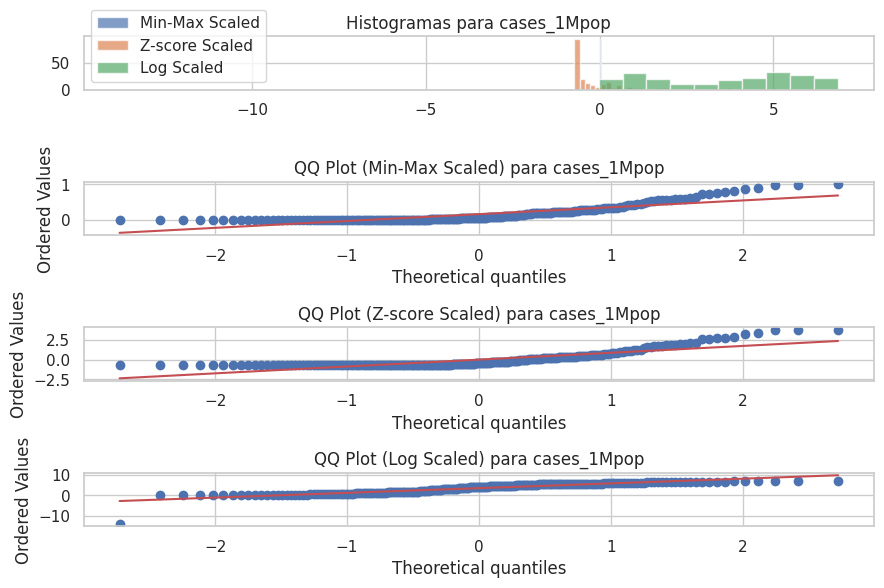

<ipython-input-137-7ac2bca099b9>:34: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_min_max_scaled[column], label='Min-Max Scaled', shade=True)
<ipython-input-137-7ac2bca099b9>:35: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_standard_scaled[column], label='Z-score Scaled', shade=True)
<ipython-input-137-7ac2bca099b9>:36: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_log_scaled[column], label='Log Scaled', shade=True)


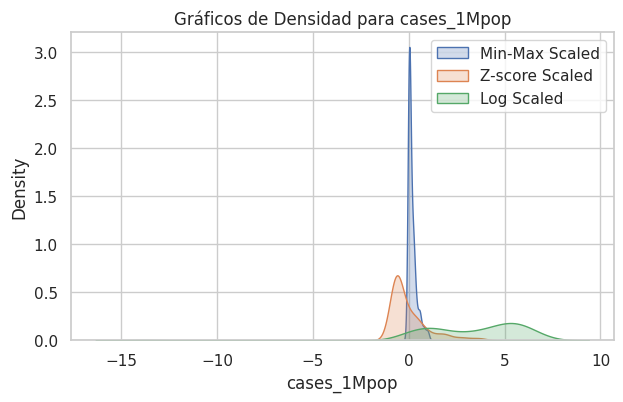

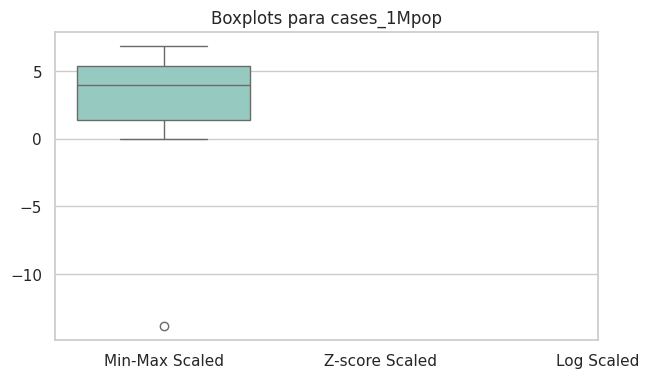

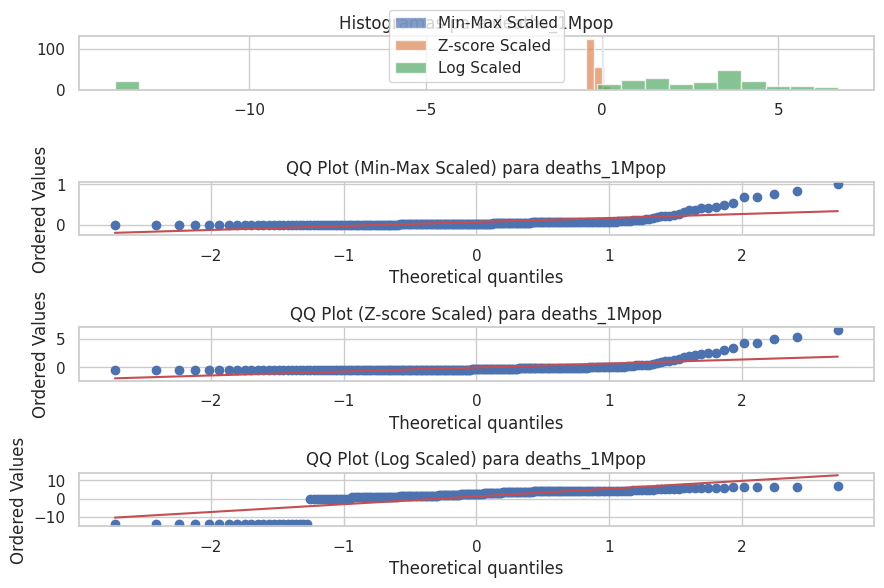

<ipython-input-137-7ac2bca099b9>:34: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_min_max_scaled[column], label='Min-Max Scaled', shade=True)
<ipython-input-137-7ac2bca099b9>:35: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_standard_scaled[column], label='Z-score Scaled', shade=True)
<ipython-input-137-7ac2bca099b9>:36: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_log_scaled[column], label='Log Scaled', shade=True)


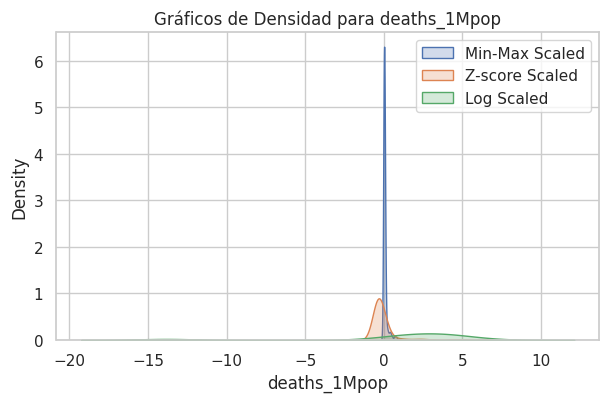

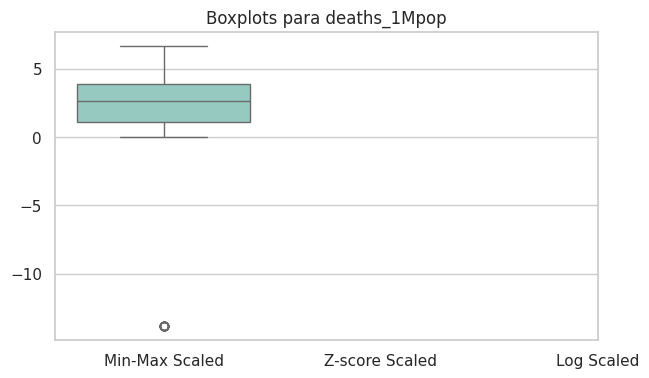

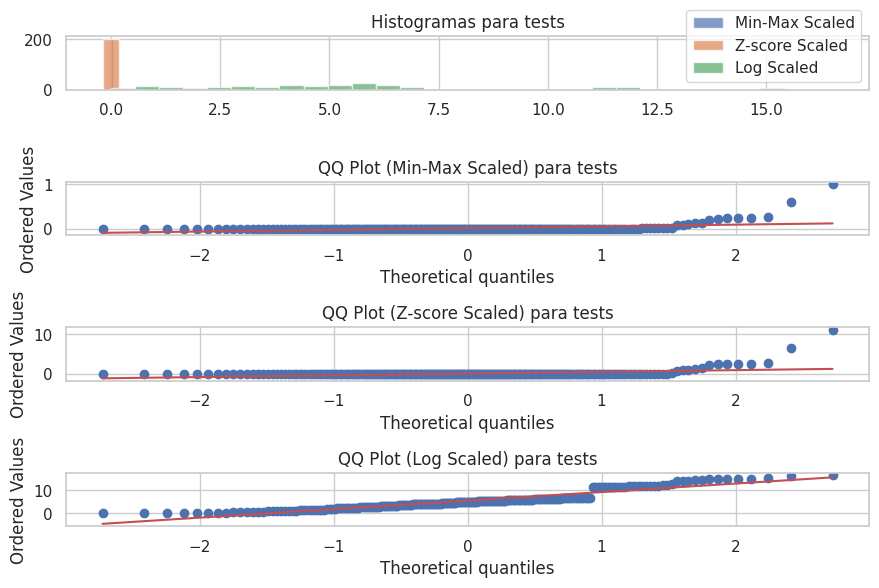

<ipython-input-137-7ac2bca099b9>:34: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_min_max_scaled[column], label='Min-Max Scaled', shade=True)
<ipython-input-137-7ac2bca099b9>:35: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_standard_scaled[column], label='Z-score Scaled', shade=True)
<ipython-input-137-7ac2bca099b9>:36: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_log_scaled[column], label='Log Scaled', shade=True)


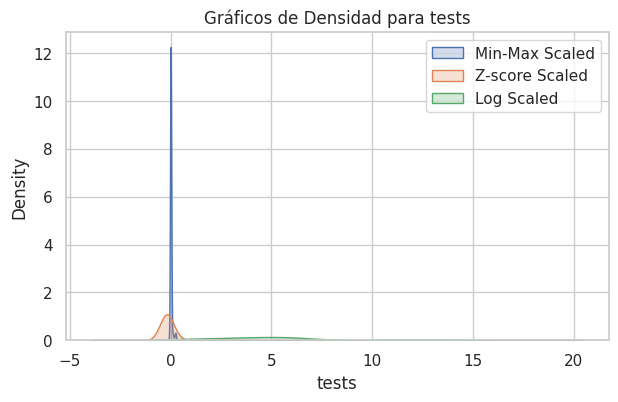

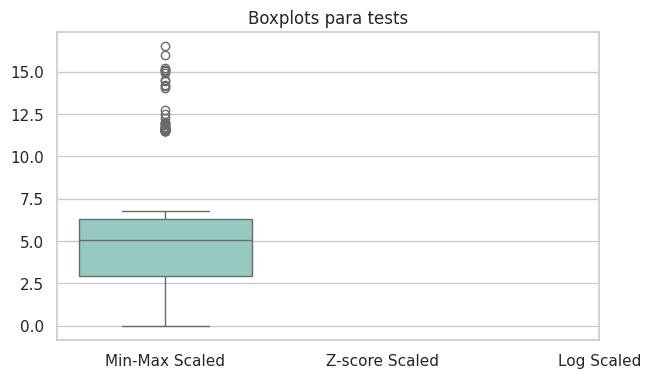

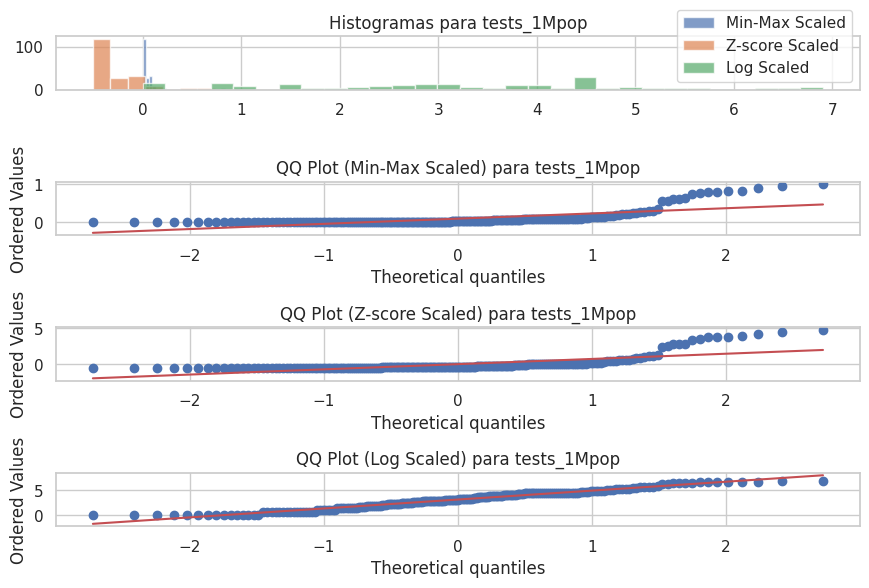

<ipython-input-137-7ac2bca099b9>:34: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_min_max_scaled[column], label='Min-Max Scaled', shade=True)
<ipython-input-137-7ac2bca099b9>:35: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_standard_scaled[column], label='Z-score Scaled', shade=True)
<ipython-input-137-7ac2bca099b9>:36: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_log_scaled[column], label='Log Scaled', shade=True)


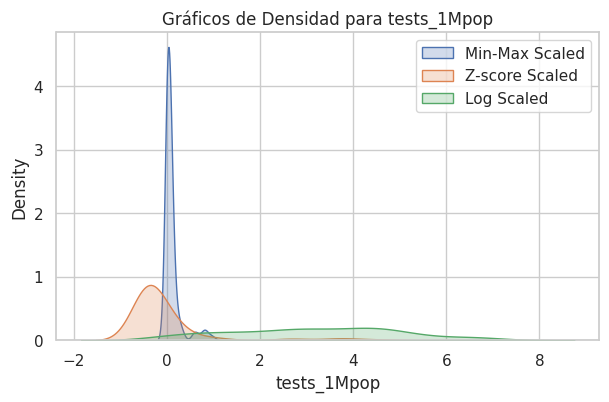

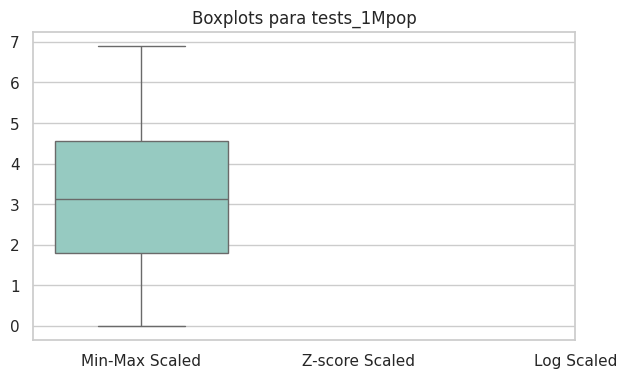

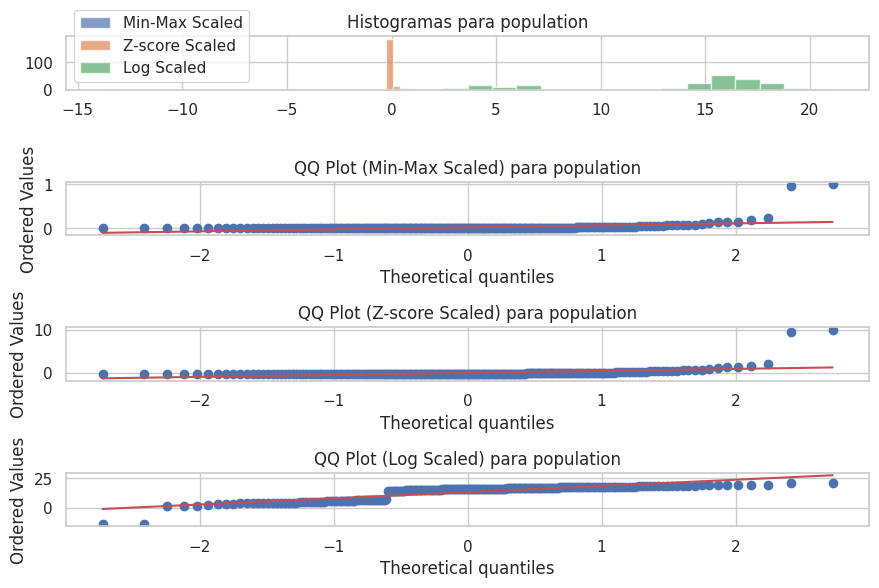

<ipython-input-137-7ac2bca099b9>:34: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_min_max_scaled[column], label='Min-Max Scaled', shade=True)
<ipython-input-137-7ac2bca099b9>:35: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_standard_scaled[column], label='Z-score Scaled', shade=True)
<ipython-input-137-7ac2bca099b9>:36: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_log_scaled[column], label='Log Scaled', shade=True)


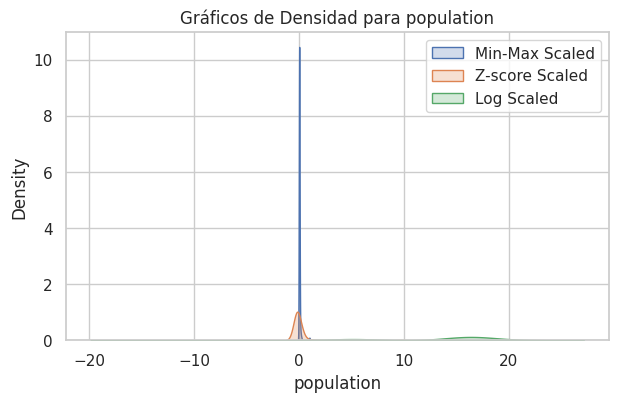

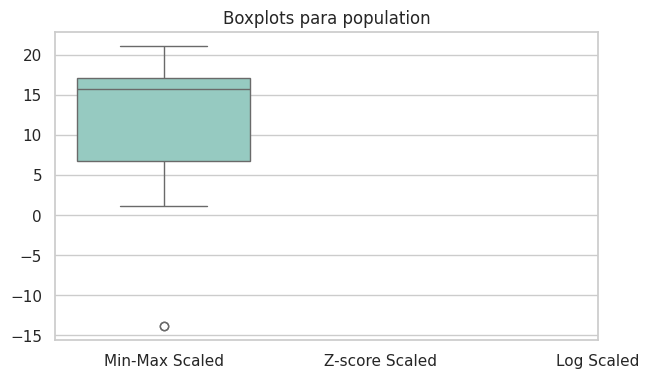

In [ ]:
# Lista de variables a analizar
columns = columns_to_normalize

for column in columns:
    # Histograma, QQ Plot y Boxplot por técnica
    plt.figure(figsize=(9,6))

    # 1. Histogramas
    plt.subplot(4, 1, 1)
    plt.hist(df_min_max_scaled[column], bins=30, alpha=0.7, label='Min-Max Scaled')
    plt.hist(df_standard_scaled[column], bins=30, alpha=0.7, label='Z-score Scaled')
    plt.hist(df_log_scaled[column], bins=30, alpha=0.7, label='Log Scaled')
    plt.title(f'Histogramas para {column}')
    plt.legend()

    # 2. QQ Plots
    plt.subplot(4, 1, 2)
    stats.probplot(df_min_max_scaled[column], dist="norm", plot=plt)
    plt.title(f'QQ Plot (Min-Max Scaled) para {column}')

    plt.subplot(4, 1, 3)
    stats.probplot(df_standard_scaled[column], dist="norm", plot=plt)
    plt.title(f'QQ Plot (Z-score Scaled) para {column}')

    plt.subplot(4, 1, 4)
    stats.probplot(df_log_scaled[column], dist="norm", plot=plt)
    plt.title(f'QQ Plot (Log Scaled) para {column}')

    plt.tight_layout()
    plt.show()

    # Gráficos de Densidad por técnica
    plt.figure(figsize=(9,6))
    sns.kdeplot(df_min_max_scaled[column], label='Min-Max Scaled', shade=True)
    sns.kdeplot(df_standard_scaled[column], label='Z-score Scaled', shade=True)
    sns.kdeplot(df_log_scaled[column], label='Log Scaled', shade=True)
    plt.title(f'Gráficos de Densidad para {column}')
    plt.legend()
    plt.show()

    # Boxplots por técnica
    plt.figure(figsize=(9,6))
    sns.boxplot(data=[df_min_max_scaled[column], df_standard_scaled[column], df_log_scaled[column]], palette="Set3")
    plt.xticks([0, 1, 2], ['Min-Max Scaled', 'Z-score Scaled', 'Log Scaled'])
    plt.title(f'Boxplots para {column}')
    plt.show()


### 2C: Aplicar los métodos de discretización vistos en clase. Documente ventajas y desventajas de cada método.

In [ ]:
# 3. Discretización
!pip install -q scikit-learn
from sklearn.cluster import KMeans # Import the KMeans class
from sklearn.tree import DecisionTreeRegressor # Import DecisionTreeRegressor

columns_to_normalize = ['cases', 'deaths', 'recovered', 'active', 'critical', 'cases_1Mpop', 'deaths_1Mpop', 'tests', 'tests_1Mpop', 'population']

df_equal_width = df.copy()
df_equal_frequency = df.copy()
df_kmeans = df.copy()
df_tree = df.copy()

# Aplicar discretización
for col in columns_to_normalize:
    # Discretización por Igual Amplitud (Equal Width Binning)
    df_equal_width[f'Equal Width Bins {col}'] = pd.cut(df[col], bins=5, labels=False)

    # Discretización por Igual Frecuencia (Equal Frequency Binning)
    df_equal_frequency[f'Equal Frequency Bins {col}'] = pd.qcut(df[col], q=5, labels=False)

    # Discretización por K-Means
    kmeans = KMeans(n_clusters=5, random_state=42)
    df_kmeans[f'K-Means Bins {col}'] = kmeans.fit_predict(df[[col]])

    # Discretización por Árboles de Decisión - Use DecisionTreeRegressor for continuous data
    tree = DecisionTreeRegressor(max_leaf_nodes=5) # Changed to DecisionTreeRegressor
    df_tree[f'Tree Bins {col}'] = tree.fit(df[[col]], df[[col]]).predict(df[[col]]) # Use predict instead of apply

# Mostrar las primeras filas de cada DataFrame discretizado para verificar
print("Equal Width Binning:")
print(df_equal_width.head())

print("\nEqual Frequency Binning:")
print(df_equal_frequency.head())

print("\nK-Means Binning:")
print(df_kmeans.head())

print("\nTree Binning:")
print(df_tree.head())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

Equal Width Binning:
   rank country      cases  deaths   recovered        active  critical  \
0     1     USA  1696547.0    99.0  456.000000  1.140391e+06      17.0   
1     2  Brazil      367.0    22.0  149.000000  1.950000e+02       8.0   
2     3  Russia      353.0     3.0  118.000000  2.300000e+02       2.0   
3     4   Spain      282.0    28.0  196.000000  5.700000e+01     854.0   
4     5      UK      261.0    36.0  135.964895  1.526476e+02       1.0   

   cases_1Mpop  deaths_1Mpop       tests  ...  Equal Width Bins cases  \
0          5.0         301.0  15029393.0  ...                       4   
1          1.0         108.0       735.0  ...                       0   
2          2.0          25.0   8945384.0  ...                       0   
3          6.0         615.0   3556567.0  ...                       0   
4          3.0         544.0   3532634.0  ...                       0   

   Equal Width Bins deaths Equal Width Bins recovered  \
0                        0            

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
data = {
    'cases': np.random.lognormal(mean=1, sigma=1, size=1000),
    'deaths': np.random.lognormal(mean=0.5, sigma=1, size=1000),
    'recovered': np.random.lognormal(mean=1, sigma=0.5, size=1000),
    'tests': np.random.lognormal(mean=1, sigma=0.75, size=1000)
}
df = pd.DataFrame(data)

# Discretizar las variables en 5 bins iguales
bins = 5
df_discretized = df.copy()
for column in df.columns:
    df_discretized[column] = pd.cut(df[column], bins=bins, labels=[f'Bin{i+1}' for i in range(bins)])

# Mostrar los primeros registros de las variables discretizadas
print(df_discretized.head())

  cases deaths recovered tests
0  Bin1   Bin1      Bin1  Bin1
1  Bin1   Bin1      Bin1  Bin1
2  Bin1   Bin1      Bin2  Bin2
3  Bin1   Bin1      Bin3  Bin1
4  Bin1   Bin1      Bin1  Bin1


<ipython-input-144-61f6e861a2f7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_discretized[column], palette='viridis')
<ipython-input-144-61f6e861a2f7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_discretized[column], palette='viridis')
<ipython-input-144-61f6e861a2f7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_discretized[column], palette='viridis')
<ipython-input-144-61f6e861a2f7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` 

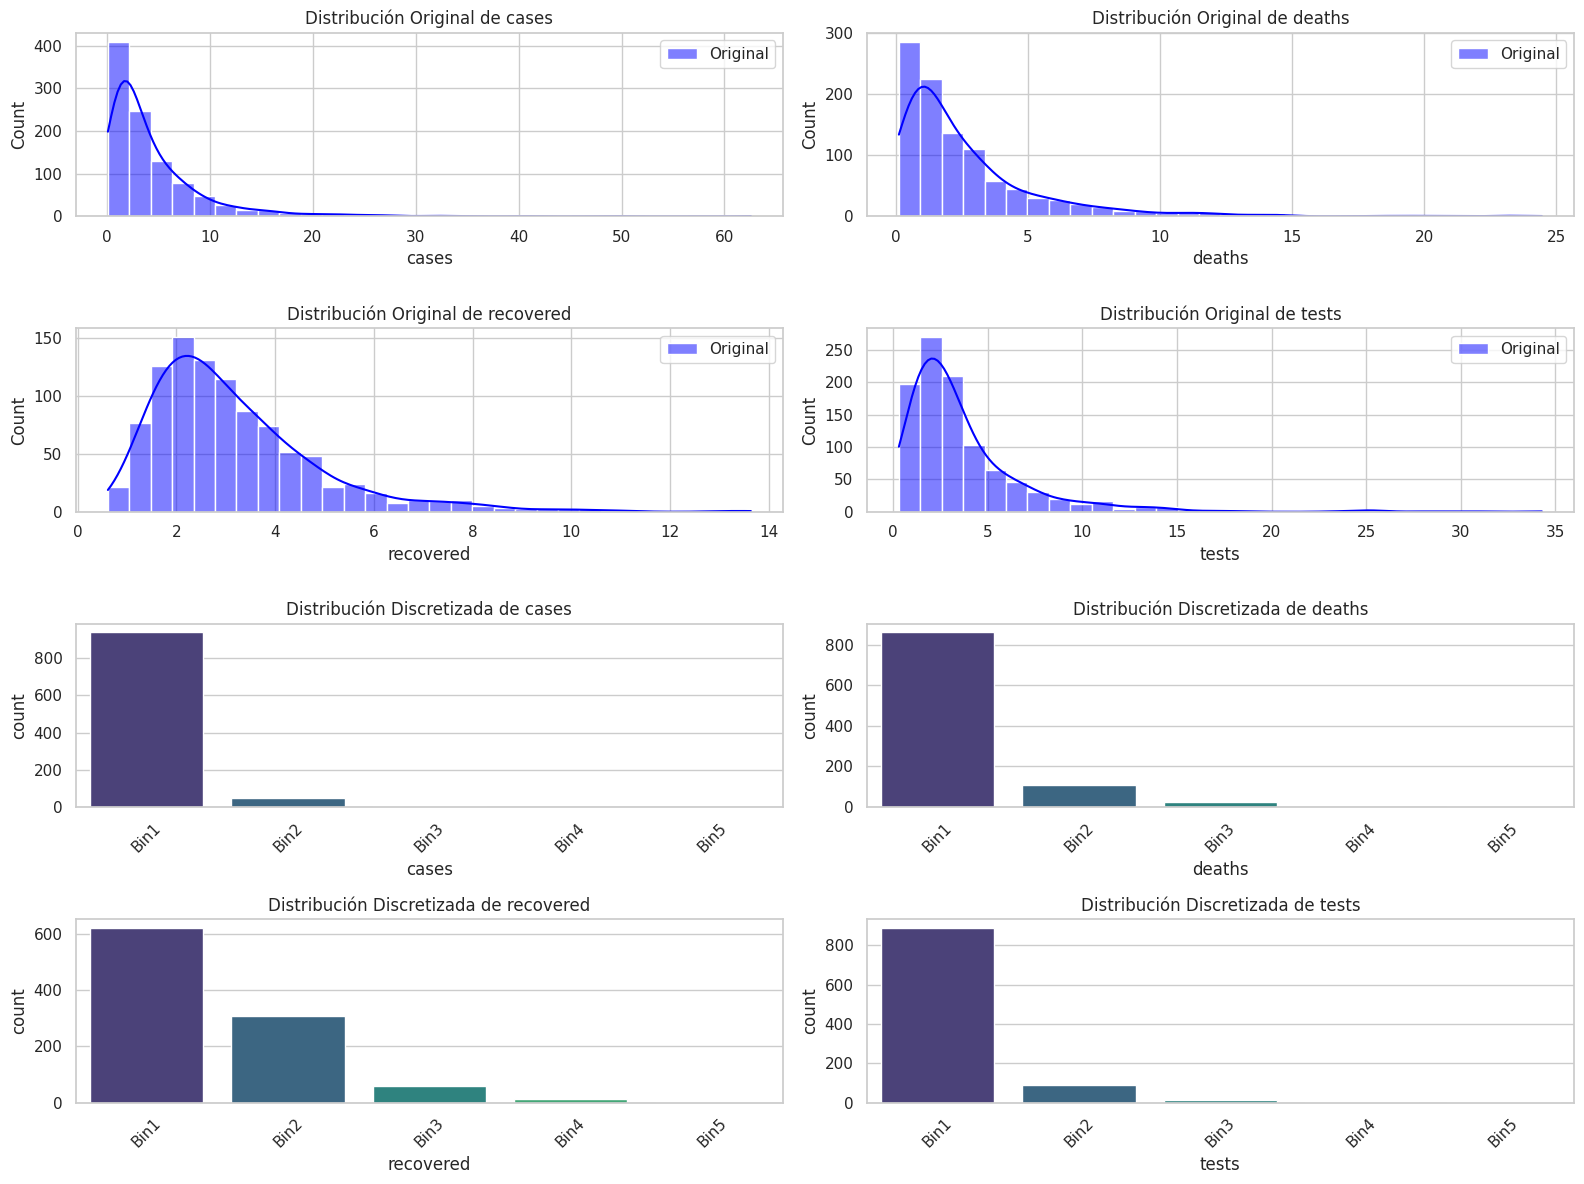

In [ ]:
# Configurar gráficos
plt.figure(figsize=(16, 12))

# Histograma para datos originales
for i, column in enumerate(df.columns, start=1):
    plt.subplot(4, 2, i)
    sns.histplot(df[column], kde=True, color='blue', label='Original', bins=30)
    plt.title(f'Distribución Original de {column}')
    plt.legend()

# Histograma para datos discretizados
for i, column in enumerate(df_discretized.columns, start=1):
    plt.subplot(4, 2, i + len(df.columns))
    sns.countplot(x=df_discretized[column], palette='viridis')
    plt.title(f'Distribución Discretizada de {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


La discretización por agual amplitud no tiene en cuenta la distribución de los datos, lo que puede llevar a que algunos intervalos contengan muy pocos o demasiados valores. Además puede no ser adecuado si la variable tiene una distribución sesgada

Discretización por igual frecuencia divide la variable en intervalos que contienen aproximadamente el mismo número de observaciones, lo que puede resultar en intervalos más equilibrados en términos de cantidad de datos, y puede manejar mejor las distribuciones sesgadas, pero los intervalos pueden ser de tamaños muy desiguales, lo que puede hacerlos menos interpretables y causar problemas si hay valores atípicos extremos. Apesar de esto, es util en este dataset de COVID-19, donde las variables tienen distribuciones muy sesgadas.

Discretización basada en K-Means, agrupa valores en k clústeres y luego asigna los puntos a estos clústeres como intervalos discretos, los intervalos se basan en la estructura subyacente de los datos, esto puede llevar a una discretización más significativa, y puede capturar patrones complejos en los datos; pero es computacionalmente costoso en grandes conjuntos de datos, aunque adecuado cuando se espera que haya patrones naturales en los datos, como distintos grupos de países con diferentes tasas de mortalidad

Discretización por quantiles, es similar a la discretización por igual frecuencia, pero se basa en los cuantiles para crear intervalos, asi que divide los datos en intervalos con un número casi igual de observaciones, es robusto frente a la variabilidad en la distribución de los datos finalmmente, los tamaños de los intervalos pueden ser muy diferentes y no  siempre serán fáciles interpretar. Es particularmente útil en análisis comparativos entre grupos, como comparar la distribución de casos por países en diferentes cuartiles.


 Discretización basada en árboles de decisión, usa un árbol de decisión para determinar los puntos de corte óptimos para dividir la variable en intervalos, se adapta a la estructura de los datos y es capaz de capturar relaciones no lineales, maneja tanto variables numéricas como categóricas. Sin embargo, la interpretación puede ser compleja si el árbol tiene muchas ramas volviendose propenso al sobreajuste. En este caso es útil para variables con relaciones complejas con otras variables, como podría ser el caso de la relación entre la tasa de mortalidad y la densidad poblacional.



### 2D: Aplique alguna transformación para reducir el sesgo. Calcule la métrica de sesgo: 3*(media - mediana) / desvío, antes y después de la transformación. Grafique las distribuciones.

In [ ]:
columns_to_normalize = ['cases', 'deaths', 'recovered', 'tests']

def calcular_sesgo(df, columnas):
    sesgos = {}
    for col in columnas:
        media = df[col].mean()
        mediana = df[col].median()
        desviacion = df[col].std()
        sesgo = 3 * (media - mediana) / desviacion
        sesgos[col] = sesgo
    return sesgos

# Calcula el sesgo para las variables originales
sesgo_original = calcular_sesgo(df, columns_to_normalize)
print("Sesgo antes de la transformación:")
print(sesgo_original)


Sesgo antes de la transformación:
{'cases': 0.9958525523642515, 'deaths': 0.995175530707593, 'recovered': 0.7018806378715741, 'tests': 0.8423923088357838}


In [ ]:
# Calcula el sesgo para las variables discretizadas con cada técnica
sesgo_equal_width = calcular_sesgo(df_equal_width, [f'Equal Width Bins {col}' for col in columns_to_normalize])
sesgo_equal_frequency = calcular_sesgo(df_equal_frequency, [f'Equal Frequency Bins {col}' for col in columns_to_normalize])
sesgo_kmeans = calcular_sesgo(df_kmeans, [f'K-Means Bins {col}' for col in columns_to_normalize])
sesgo_tree = calcular_sesgo(df_tree, [f'Tree Bins {col}' for col in columns_to_normalize])

print("\nSesgo después de Equal Width Binning:")
print(sesgo_equal_width)

print("\nSesgo después de Equal Frequency Binning:")
print(sesgo_equal_frequency)

print("\nSesgo después de K-Means Binning:")
print(sesgo_kmeans)

print("\nSesgo después de Tree Binning:")
print(sesgo_tree)



Sesgo después de Equal Width Binning:
{'Equal Width Bins cases': 0.204598301841142, 'Equal Width Bins deaths': 1.0221918345693768, 'Equal Width Bins recovered': 1.3550261449237528, 'Equal Width Bins tests': 0.4866887853099416}

Sesgo después de Equal Frequency Binning:
{'Equal Frequency Bins cases': -0.04871749504613619, 'Equal Frequency Bins deaths': -0.07700467668118247, 'Equal Frequency Bins recovered': -0.048941030583426096, 'Equal Frequency Bins tests': 0.0}

Sesgo después de K-Means Binning:
{'K-Means Bins cases': 2.075046889382176, 'K-Means Bins deaths': 0.9742347334479853, 'K-Means Bins recovered': 2.0672671432105334, 'K-Means Bins tests': 0.7306971528951146}

Sesgo después de Tree Binning:
{'Tree Bins cases': 0.20784553884555104, 'Tree Bins deaths': 1.5455899843520946, 'Tree Bins recovered': 1.6831287017955658, 'Tree Bins tests': 0.5575770187959016}


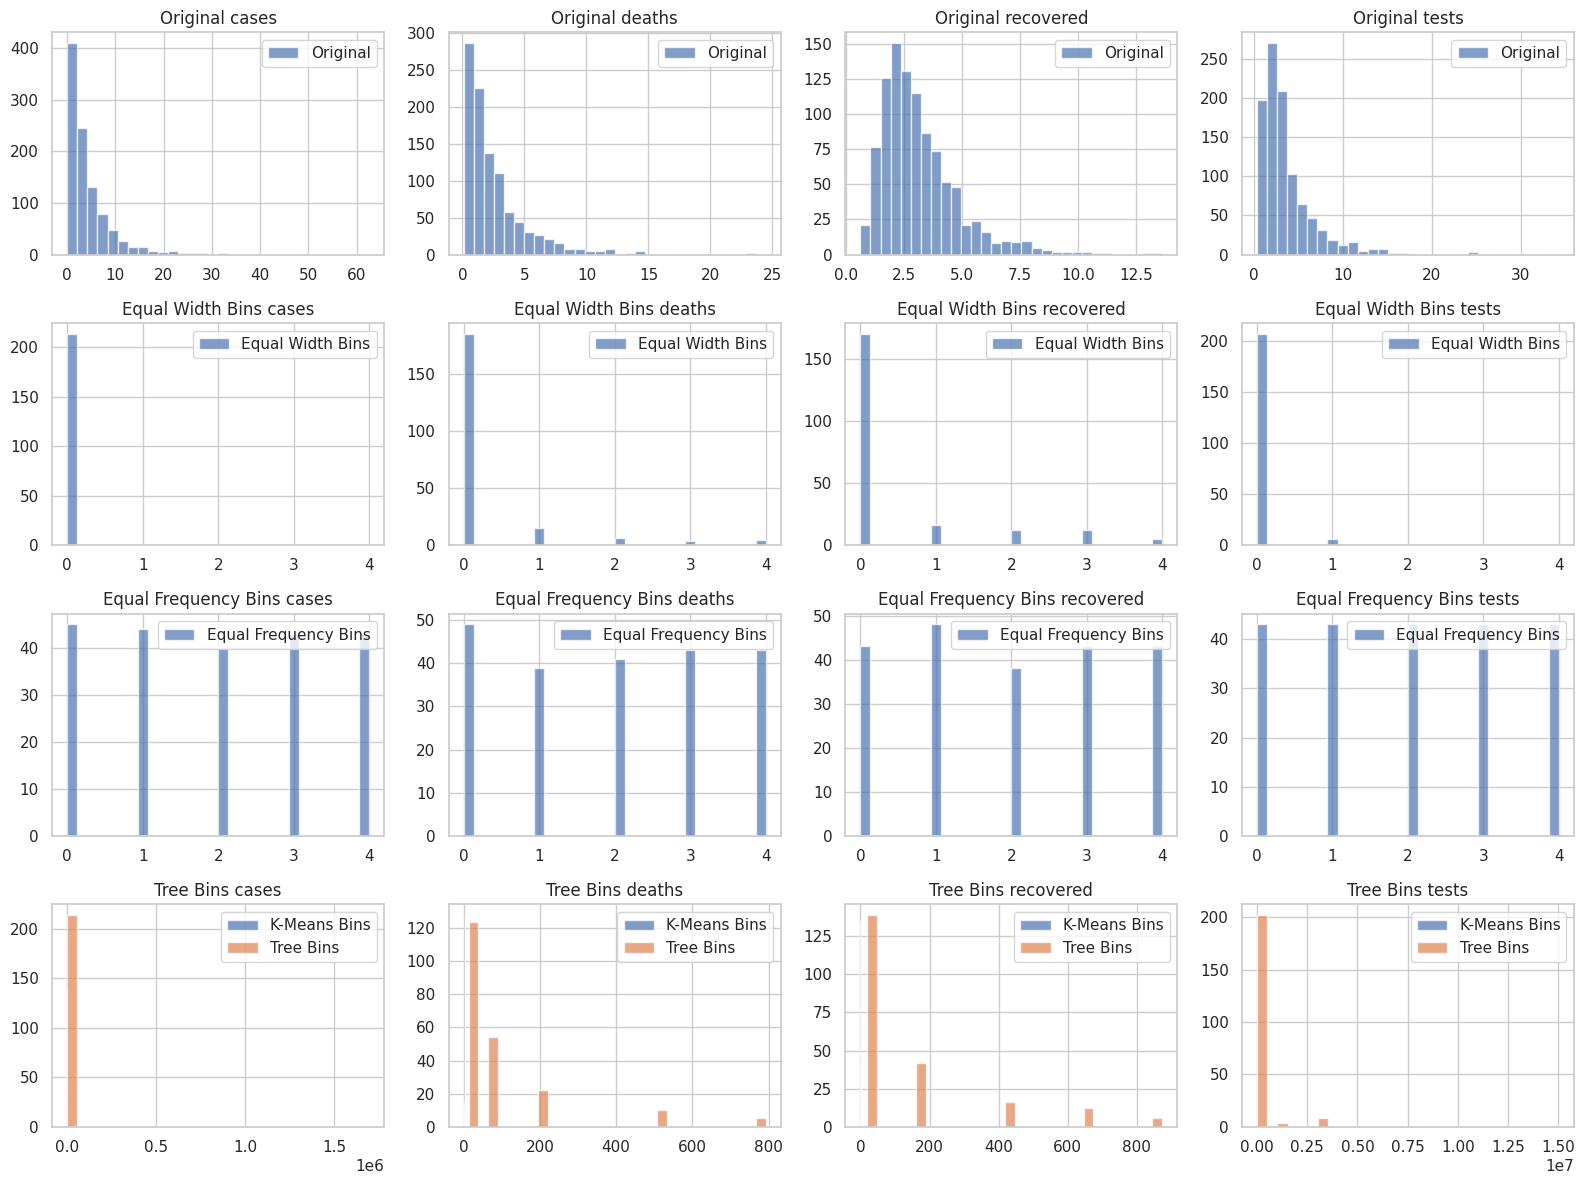

In [ ]:
# Graficar histogramas antes de la discretización
plt.figure(figsize=(16, 12))
for i, col in enumerate(columns_to_normalize, 1):
    plt.subplot(4, len(columns_to_normalize), i)
    plt.hist(df[col], bins=30, alpha=0.7, label='Original')
    plt.title(f'Original {col}')
    plt.legend()

# Graficar histogramas después de Equal Width Binning
for i, col in enumerate(columns_to_normalize, 1):
    plt.subplot(4, len(columns_to_normalize), len(columns_to_normalize) + i)
    plt.hist(df_equal_width[f'Equal Width Bins {col}'], bins=30, alpha=0.7, label='Equal Width Bins')
    plt.title(f'Equal Width Bins {col}')
    plt.legend()

# Graficar histogramas después de Equal Frequency Binning
for i, col in enumerate(columns_to_normalize, 1):
    plt.subplot(4, len(columns_to_normalize), 2 * len(columns_to_normalize) + i)
    plt.hist(df_equal_frequency[f'Equal Frequency Bins {col}'], bins=30, alpha=0.7, label='Equal Frequency Bins')
    plt.title(f'Equal Frequency Bins {col}')
    plt.legend()

# Graficar histogramas después de K-Means Binning
for i, col in enumerate(columns_to_normalize, 1):
    plt.subplot(4, len(columns_to_normalize), 3 * len(columns_to_normalize) + i)
    plt.hist(df_kmeans[f'K-Means Bins {col}'], bins=30, alpha=0.7, label='K-Means Bins')
    plt.title(f'K-Means Bins {col}')
    plt.legend()

# Graficar histogramas después de Tree Binning
#The 4 was changed to a 3 to avoid creating more than 16 subplots
for i, col in enumerate(columns_to_normalize, 1):
    plt.subplot(4, len(columns_to_normalize), 3 * len(columns_to_normalize) + i)
    plt.hist(df_tree[f'Tree Bins {col}'], bins=30, alpha=0.7, label='Tree Bins')
    plt.title(f'Tree Bins {col}')
    plt.legend()

plt.tight_layout()
plt.show()

### 2E: Volver aplicar binnings por frecuencia, ancho y kmeans sobre la transformación realizada en 3. ¿Cuáles métodos resultaron más y menos sensibles al sesgo?

### 2F:  Qué transformaciones considera más adecuadas para comparar la dispersión entre las variables de cantidad de casos, y cantidad de casos cada 1 millón de habitantes (cases_1Mpop).